# import

In [1]:
# if open from google colab, run this command
from google.colab import drive
drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Github/sales-prediction-gru/ipynb
# %cd /content/drive/Shareddrives/BUAT\ DIEGO/Data-retail-2015-2022-keluar/
%cd /content/drive/MyDrive/data-retail

Mounted at /content/drive
/content/drive/MyDrive/data-retail


In [2]:
import os, warnings, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model

import joblib
from keras.models import load_model

import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Set seeds to make the experiment more reproducible.
def seed_everything(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

seed = 0
seed_everything(seed)
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(20,6)})

# 2017-2021

In [3]:
# df2016 = pd.read_csv('./data-2016-renew.csv', parse_dates=['tgl'])
df2017 = pd.read_csv('./data-2017-renew.csv', parse_dates=['tgl'])
df2018 = pd.read_csv('./data-2018-renew.csv', parse_dates=['tgl'])
df2019 = pd.read_csv('./data-2019-renew.csv', parse_dates=['tgl'])
df2020 = pd.read_csv('./data-2020-renew.csv', parse_dates=['tgl'])
df2021 = pd.read_csv('./data-2021-renew.csv', parse_dates=['tgl'])
df2022 = pd.read_csv('./data-2022-renew.csv', parse_dates=['tgl'])

In [4]:
df2017.head(10)

,notxn,tgl,nonota,namabarang,satuan,qty,hargajual,hargabeli,diskon,hargaafterdiskon,...,iddivisi,kodejenis,jenis,kodekategori,kategori,kodedepartemen,departemen,namaop,kodedivisibarang,divisibarang
0,000020a5-d4a7-4d45-acc8-9071f879845e,2017-10-08 10:21:56.667,21710009486,SHINZUI SOAP REGULAR75GR*144,PCS,2.00,3850.00,3509.03,0.00,3850.00,...,1091.00,10301,Bath Care (1),103,Healt & Beauty Care (3),1,NaN,Damayanti,NaN,NaN
1,0000224e-6052-47b3-a093-f96769424754,2017-06-10 15:14:28.343,21706011595,KOL PUTIH/KG,KG,0.19,10000.00,7500.00,0.00,10000.00,...,106.00,20607,Vegetable (7),206,Fresh Food (6),2,NaN,Sudarsini,NaN,NaN
2,00002bb7-7524-4856-91a4-ba8c7f6fa772,2017-09-18 20:38:05.290,21709022315,PASEO SMART TOILET WHT 6143*64,PCS,1.00,7250.00,6508.76,0.00,7250.00,...,1032.00,10507,Tissue & Cotton (7),105,Cleaning (5),1,NaN,Titik,NaN,NaN
3,00002e5c-6dc5-4d8a-a688-c6c18e77d58c,2017-02-03 19:58:25.060,21702003890,POND'S WB NIGHT CREAM 20GR/48,PCS,1.00,17300.00,16550.00,0.00,17300.00,...,124.00,10302,Cosmetic & Accessories (2),103,Healt & Beauty Care (3),1,NaN,Ariani,NaN,NaN
4,000034d6-0f63-4c4e-b763-3bfa23299945,2017-05-27 15:44:34.500,21705030566,INDOMIE RASA SOTO SPESIAL 75GR,PCS,2.00,2100.00,1947.49,0.00,2100.00,...,1025.00,20113,Noodle & Pasta (13),201,Food (1),2,NaN,Antari,NaN,NaN
5,000037e1-758d-4ba8-b97e-0fbd2bf8f2ad,2017-12-03 17:01:00.420,21712003422,TB L/XL UK 30,PCS,1.00,0.00,0.00,0.00,0.00,...,19.00,10601,Home Applience (1,106,Homes (6),1,NaN,Damayanti,NaN,NaN
6,00003938-8f49-4af4-b10e-ecfe73ac7656,2017-10-31 15:57:49.297,21710037352,INDOMIE KALDU AYAM,PCS,2.00,2050.00,1919.99,0.00,2050.00,...,1025.00,20113,Noodle & Pasta (13),201,Food (1),2,NaN,Lina,NaN,NaN
7,0000529b-a2dc-49b7-b810-c0c5c99b048c,2017-03-10 14:03:49.983,21703012567,ROYCO FDS BEEF 100GR,PCS,1.00,4500.00,4200.01,0.00,4500.00,...,124.00,20117,Seasoning (17),201,Food (1),2,NaN,Ariani,NaN,NaN
8,0000591a-eb77-41ef-890f-565226973114,2017-07-07 18:50:42.257,21707008230,PEPSODENT SNSTV EXPERT WHT 100GR,PCS,1.00,21750.00,20500.00,0.00,21750.00,...,124.00,10307,Oral Care (7),103,Healt & Beauty Care (3),1,NaN,Gede,NaN,NaN
9,00007960-200f-4d3a-b2b2-18aa09f238d9,2017-03-02 20:26:00.757,21703002743,MOLTO EDP BLACK PURPLE 22ML/216 (18),BDD,2.00,10000.00,9300.00,0.00,10000.00,...,124.00,10506,Softener (6),105,Cleaning (5),1,NaN,Antari,NaN,NaN


In [ ]:
# print("kodekategori 2016: ", df2016['kodekategori'].unique())
# print("kategori 2016: ", df2016['kategori'].unique())
# print("2017: ", df2017['kategori'].unique())
# print("2018: ", df2018['kategori'].unique())
# print("2019: ", df2019['kategori'].unique())
# print("2020: ", df2020['kategori'].unique())

In [ ]:
# get unique kategori value

# group_kategori2017 = df2017.groupby('kodekategori')['kategori'].unique().reset_index()
# group_kategori2018 = df2018.groupby('kodekategori')['kategori'].unique().reset_index()
# group_kategori2019 = df2019.groupby('kodekategori')['kategori'].unique().reset_index()
# group_kategori2020 = df2020.groupby('kodekategori')['kategori'].unique().reset_index()
# group_kategori2021 = df2021.groupby('kodekategori')['kategori'].unique().reset_index()

# pdList = [group_kategori2017, group_kategori2018, group_kategori2019, group_kategori2020, group_kategori2021]

# new_kategori = pd.concat(pdList).reset_index(drop=True)
# new_kategori['kodekategori'] = new_kategori['kodekategori'].astype(float)
# new_kategori['kategori'] = new_kategori['kategori'].astype(str)

# clean_kategori = new_kategori.drop_duplicates(subset=['kodekategori']).reset_index(drop=True)

In [ ]:
# display(clean_kategori.T)

In [ ]:
# initiate the kategori list that will removed from dataset
# kategori_remove_name = ["Fresh Food (6)", "Roti dan Kue (Bread & Cake)", "Sarapan Pagi (Breakfast)", "Makanan Mentah (Raw Food)", "Ice", "Makanan Masak (Cooked Food)", "Buah (Fruit)", "Sayur (Vegetable)", "Harian (Daily)", "Beku (Frozen)", "Telur (Egg)", "Produk Siap Makan (Ready To Eat)", "Daging Merah (Red Meat)", "Daging Putih (White Meat)"]
# kategori_remove_list = ["206.00", "10104.00", "10105.00", "10108.00", "10109.00", "10110.00", "20101.00", "20201.00", "20502.00", "20503.00", "20504.00", "20601.00", "20301.00", "20302.00"]

In [ ]:
# kategori_name_df = pd.DataFrame(kategori_remove_name)
# kategori_name_df.to_csv('kategori_delist.csv', index=False)

In [ ]:
# drop unnecessary column
df2017 = df2017.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2018 = df2018.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2019 = df2019.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2020 = df2020.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2021 = df2021.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

In [ ]:
# concat 5 dataframe to single df
df = pd.concat([df2017, df2018, df2019, df2020, df2021]).reset_index(drop=True)

In [ ]:
# remove strange value in each rows from barcode column
df['barcode'] = df['barcode'].str.split(' ').str[0]

In [ ]:
df.head(10)

,tgl,namabarang,satuan,qty,barcode,kodecustomer,kodejenis,jenis,kodekategori,kategori
0,2017-10-08 10:21:56.667,SHINZUI SOAP REGULAR75GR*144,PCS,2.00,8992946511790,CU00000001,10301,Bath Care (1),103.00,Healt & Beauty Care (3)
1,2017-06-10 15:14:28.343,KOL PUTIH/KG,KG,0.19,00172677,CU00000001,20607,Vegetable (7),206.00,Fresh Food (6)
2,2017-09-18 20:38:05.290,PASEO SMART TOILET WHT 6143*64,PCS,1.00,8993053211672,CU00000001,10507,Tissue & Cotton (7),105.00,Cleaning (5)
3,2017-02-03 19:58:25.060,POND'S WB NIGHT CREAM 20GR/48,PCS,1.00,8999999056872,CU00000001,10302,Cosmetic & Accessories (2),103.00,Healt & Beauty Care (3)
4,2017-05-27 15:44:34.500,INDOMIE RASA SOTO SPESIAL 75GR,PCS,2.00,089686910384,CU00000001,20113,Noodle & Pasta (13),201.00,Food (1)
5,2017-12-03 17:01:00.420,TB L/XL UK 30,PCS,1.00,56103,CU00000001,10601,Home Applience (1,106.00,Homes (6)
6,2017-10-31 15:57:49.297,INDOMIE KALDU AYAM,PCS,2.00,089686010107,CU00000001,20113,Noodle & Pasta (13),201.00,Food (1)
7,2017-03-10 14:03:49.983,ROYCO FDS BEEF 100GR,PCS,1.00,8999999192198,CU00000001,20117,Seasoning (17),201.00,Food (1)
8,2017-07-07 18:50:42.257,PEPSODENT SNSTV EXPERT WHT 100GR,PCS,1.00,8999999032890,CU00000001,10307,Oral Care (7),103.00,Healt & Beauty Care (3)
9,2017-03-02 20:26:00.757,MOLTO EDP BLACK PURPLE 22ML/216 (18),BDD,2.00,8999999057640,CU00000001,10506,Softener (6),105.00,Cleaning (5)


In [ ]:
# pake C001 / TB / Jasa Pendingin / toys / zandilac
# drop unnesecary value from dataset 
df = df[df['kodecustomer'].isin(['CU00000001'])].reset_index(drop=True)
df = df[~df['barcode'].isin(['56101','56102','56103','56104'])].reset_index(drop=True)
df = df[~df['namabarang'].str.contains('JASA PENDINGIN')].reset_index(drop=True)
df = df[~df['kategori'].str.contains('Toys', na=False)].reset_index(drop=True)
df = df[~df['namabarang'].str.contains('ZANDILAC')].reset_index(drop=True)
# df = df.query('qty >= 0 & qty <= 2000')
df = df.query('qty >= 0')

In [ ]:
# create new column named "month_year" to get number of month and year
df['month_year'] = df['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

In [ ]:
# transform the value to number of month from all rows
# 2017-2021
df['month_year'] = df['month_year'].map({'01-17':0,'02-17':1,'03-17':2,'04-17':3,'05-17':4,'06-17':5,'07-17':6,'08-17':7,'09-17':8,'10-17':9,'11-17':10,'12-17':11,
                                          '01-18':12,'02-18':13,'03-18':14,'04-18':15,'05-18':16,'06-18':17,'07-18':18,'08-18':19,'09-18':20,'10-18':21,'11-18':22,'12-18':23,
                                          '01-19':24,'02-19':25,'03-19':26,'04-19':27,'05-19':28,'06-19':29,'07-19':30,'08-19':31,'09-19':32,'10-19':33,'11-19':34,'12-19':35,
                                          '01-20':36,'02-20':37,'03-20':38,'04-20':39,'05-20':40,'06-20':41,'07-20':42,'08-20':43,'09-20':44,'10-20':45,'11-20':46,'12-20':47,
                                          '01-21':48,'02-21':49,'03-21':50,'04-21':51,'05-21':52,'06-21':53,'07-21':54,'08-21':55,'09-21':56,'10-21':57,'11-21':58,'12-21':59})

In [ ]:
# drop unnecessary kategori #tidak diremove
# df = df[~df['kategori'].isin(kategori_remove_name)].reset_index(drop=True)

In [ ]:
df["qty"].describe()

count   11534765.00
mean           1.52
std            4.75
min            0.00
25%            1.00
50%            1.00
75%            1.00
max        10000.00
Name: qty, dtype: float64

In [ ]:
display(df.info())
display(df.head())
# Int64Index: 11534762 entries, 0 to 11535920 (<=2000)
# Int64Index: 11534765 entries, 0 to 11535920 (>=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11534765 entries, 0 to 11535920
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   tgl           datetime64[ns]
 1   namabarang    object        
 2   satuan        object        
 3   qty           float64       
 4   barcode       object        
 5   kodecustomer  object        
 6   kodejenis     object        
 7   jenis         object        
 8   kodekategori  float64       
 9   kategori      object        
 10  month_year    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 1.0+ GB


None

,tgl,namabarang,satuan,qty,barcode,kodecustomer,kodejenis,jenis,kodekategori,kategori,month_year
0,2017-10-08 10:21:56.667,SHINZUI SOAP REGULAR75GR*144,PCS,2.00,8992946511790,CU00000001,10301,Bath Care (1),103.00,Healt & Beauty Care (3),9
1,2017-06-10 15:14:28.343,KOL PUTIH/KG,KG,0.19,00172677,CU00000001,20607,Vegetable (7),206.00,Fresh Food (6),5
2,2017-09-18 20:38:05.290,PASEO SMART TOILET WHT 6143*64,PCS,1.00,8993053211672,CU00000001,10507,Tissue & Cotton (7),105.00,Cleaning (5),8
3,2017-02-03 19:58:25.060,POND'S WB NIGHT CREAM 20GR/48,PCS,1.00,8999999056872,CU00000001,10302,Cosmetic & Accessories (2),103.00,Healt & Beauty Care (3),1
4,2017-05-27 15:44:34.500,INDOMIE RASA SOTO SPESIAL 75GR,PCS,2.00,089686910384,CU00000001,20113,Noodle & Pasta (13),201.00,Food (1),4


In [ ]:
df2000 = df.query('qty >= 2000.00').sort_values(by="qty", ascending=False)
df1000 = df.query('qty >= 1000.00').sort_values(by="qty", ascending=False)
df500 = df.query('qty >= 500.00').sort_values(by="qty", ascending=False)
df400 = df.query('qty <= 400.00 & qty >= 300.00').sort_values(by="qty", ascending=False)
df300 = df.query('qty <= 300.00 & qty >= 200.00').sort_values(by="qty", ascending=False)
df200 = df.query('qty <= 200.00 & qty >= 100.00').sort_values(by="qty", ascending=False)
dfunlimit200 = df.query('qty >= 200.00').sort_values(by="qty", ascending=False)
dflimit500 = df.query('qty <= 500.00').sort_values(by="qty", ascending=False)
dflimit400 = df.query('qty <= 400.00').sort_values(by="qty", ascending=False)
dflimit300 = df.query('qty <= 300.00').sort_values(by="qty", ascending=False)
dflimit200 = df.query('qty <= 200.00').sort_values(by="qty", ascending=False)
dfunlimit300 = df.query('qty >= 300.00').sort_values(by="qty", ascending=False)

In [ ]:
df400

,tgl,namabarang,satuan,qty,barcode,kodecustomer,kodejenis,jenis,kodekategori,kategori,month_year
930920,2017-02-18 12:47:06.330,SEDAAP MIE RASA SOTO,PCS,400.00,8998866200325,CU00000001,20113,Noodle & Pasta (13),201.00,Food (1),1
2149752,2017-02-18 12:47:00.640,INDOMIE RASA SOTO SPESIAL 75GR,PCS,400.00,089686910384,CU00000001,20113,Noodle & Pasta (13),201.00,Food (1),1
4717960,2018-08-11 13:52:51.610,INDOMIE GORENG SPECIAL,PCS,400.00,089686010947,CU00000001,20113,Noodle & Pasta (13),201.00,Food (1),19
10001550,2021-07-04 19:25:58.237,NESCAFE 3IN1 ORIGINAL 17.5GR,PCS,400.00,8992696420557,CU00000001,01020203,Kopi Instant,10202.00,Kopi (Coffe),54
8777759,2020-04-19 14:20:33.673,SEDAAP MIE RASA SOTO,PCS,400.00,8998866200325,CU00000001,01011202,Mie Instant,10112.00,Mie (Noodle),39
6693853,2019-03-25 14:04:49.253,PONDS AM NIGHT CREAM 10GR*36,PCS,396.00,8999999059934,CU00000001,03030207,Night Cream,30302.00,Perawatan Wajah (Face Care),26
5437140,2019-04-27 17:12:26.930,PONDS AM NIGHT CREAM 10GR*36,PCS,396.00,8999999059934,CU00000001,03030207,Night Cream,30302.00,Perawatan Wajah (Face Care),27
3167266,2018-04-27 14:22:26.333,BIMOLI 48*250ML,BTL,385.00,8992628026147,CU00000001,20108,Cooking Oil (8),201.00,Food (1),15
1428458,2017-09-05 10:26:35.343,LIFEBUOY TS NATURE PURE 85GR/144,PCS,380.00,8999999059330,CU00000001,10301,Bath Care (1),103.00,Healt & Beauty Care (3),8
1978404,2017-11-30 14:10:02.160,PEPSODENT WHITE 190GR*48,PCS,378.00,8999999706180,CU00000001,10307,Oral Care (7),103.00,Healt & Beauty Care (3),10


In [ ]:
# df400.to_csv('df400to300.csv', index=False)
# df300.to_csv('df300to200.csv', index=False)
# df200.to_csv('df200to100.csv', index=False)
# dfunlimit200.to_csv('df200tounlimit.csv', index=False)

In [ ]:
barcode_u = len(pd.unique(dfunlimit300['barcode']))
namabarang_u = len(pd.unique(dfunlimit300['namabarang']))
print('Unique Barcode:',barcode_u)
print('Unique Kode namabarang:',namabarang_u)

Unique Barcode: 48
Unique Kode namabarang: 49


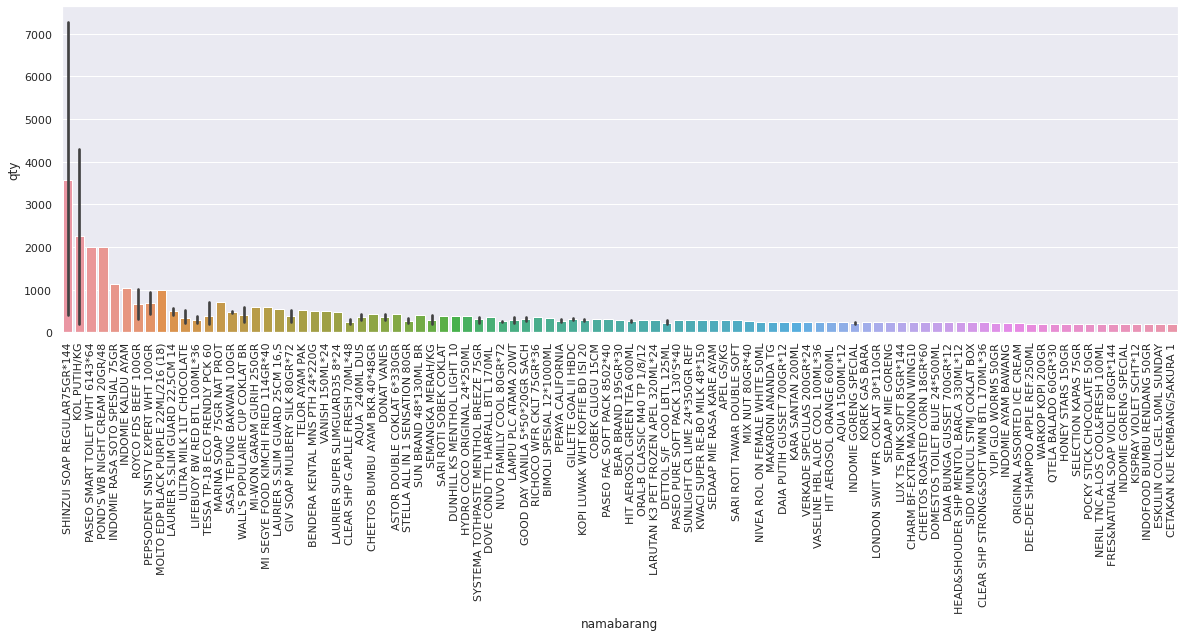

In [ ]:
g = sns.barplot(x=dfunlimit200.namabarang,
                y=dfunlimit200.qty)
g.set_xticklabels(labels=df.namabarang ,rotation=90)
plt.show()

[Text(0, 0, 'INDOMIE KALDU AYAM'),
 Text(0, 0, 'INDOMIE AYAM BAWANG'),
 Text(0, 0, 'TAS BELANJA OXIUM 25*100PCS'),
 Text(0, 0, 'TAS BELANJA OXIUM 15*100PCS'),
 Text(0, 0, 'KUNCI MAS 12*1000ML REFFIL'),
 Text(0, 0, 'FILMA 12*1000ML.REFFIL'),
 Text(0, 0, 'PEPSODENT WHITE 120GR*72'),
 Text(0, 0, 'PEPSODENT WHITE 25GR*432'),
 Text(0, 0, 'PEPSODENT HERBAL REL 120GR*72'),
 Text(0, 0, 'PEPSODENT WHITE 190GR*48'),
 Text(0, 0, 'INDOMIE RASA SOTO MIE'),
 Text(0, 0, 'INDOMIE GORENG SPECIAL'),
 Text(0, 0, 'PEPSODENT WHITE 225GR'),
 Text(0, 0, 'CLOSE UP GREEN/MENTHOL 110Gr*48'),
 Text(0, 0, 'ADEM SARI CHINGKU 350ML BTL'),
 Text(0, 0, 'SUNLIGHT LIME 12*800ML REF'),
 Text(0, 0, 'FORTUNE MYK GRG.12*1LTR REF'),
 Text(0, 0, 'ADEM SARI CHINGKU 330ML'),
 Text(0, 0, 'NUVO HANDSAND HIJAU 50ML BTL'),
 Text(0, 0, 'FAIR&LOVELY MULTIVITAMIN 25GR'),
 Text(0, 0, 'SUNLIGHT LIMESQUASH 72*105ML'),
 Text(0, 0, 'TAS BELANJA OXIUM 37*100PCS'),
 Text(0, 0, 'TAS BELANJA OXIUM 30*100PCS'),
 Text(0, 0, 'BUKU TULIS DODO 58L

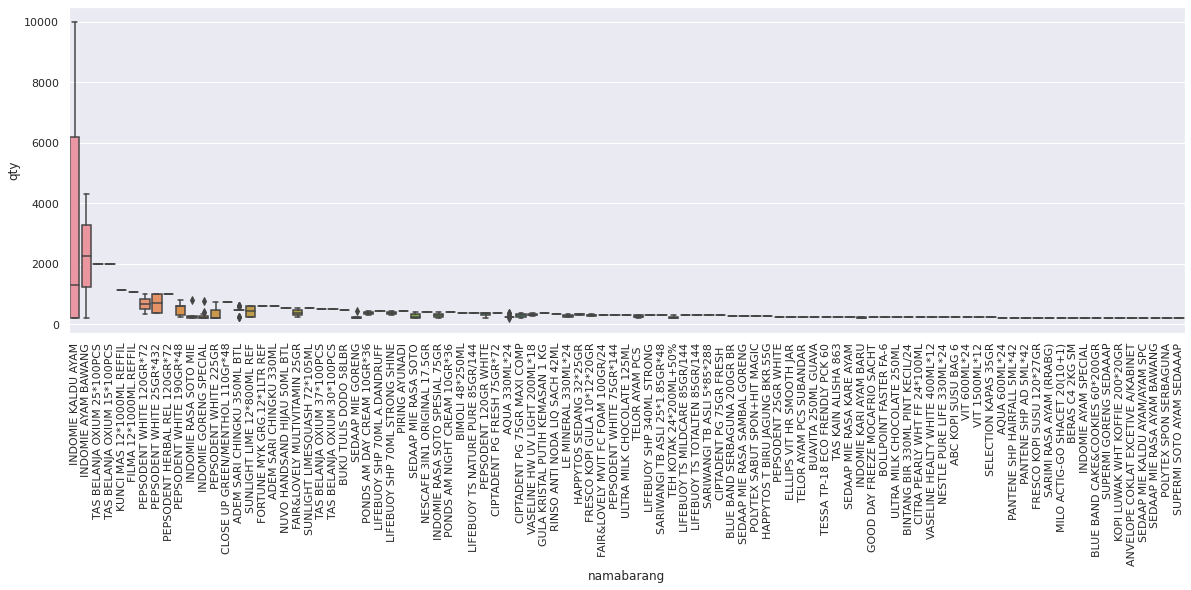

In [ ]:
ax = sns.boxplot(x='namabarang', y='qty', data=dfunlimit200)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [ ]:
# df_outlier = df.query('qty > 0 & qty <= 50')
# sns.set(rc={'figure.figsize':(20,6)})
# sns.boxplot(x='month_year', y='qty', data=df_outlier)

In [ ]:
# df['satuan'].unique()

In [ ]:
# df_kg = df[df['satuan'] == "KG"]
# df_kg.info()

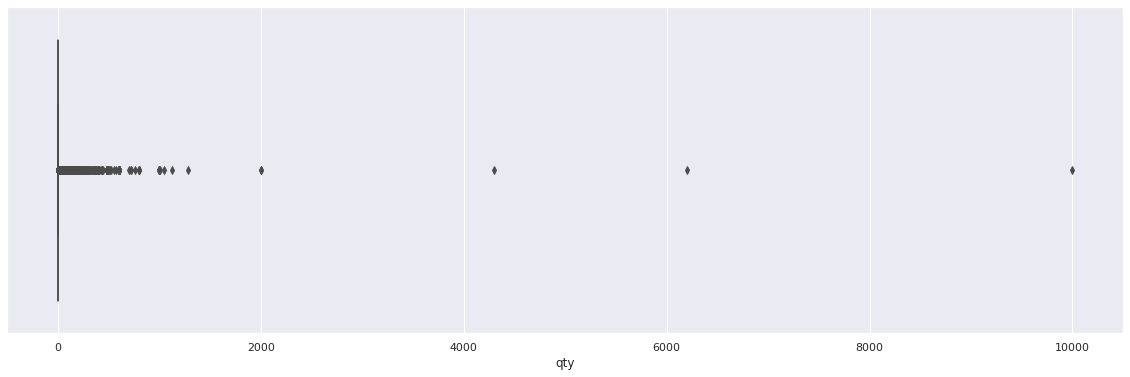

In [ ]:
ax = sns.boxplot(df['qty']) # unlimit qty

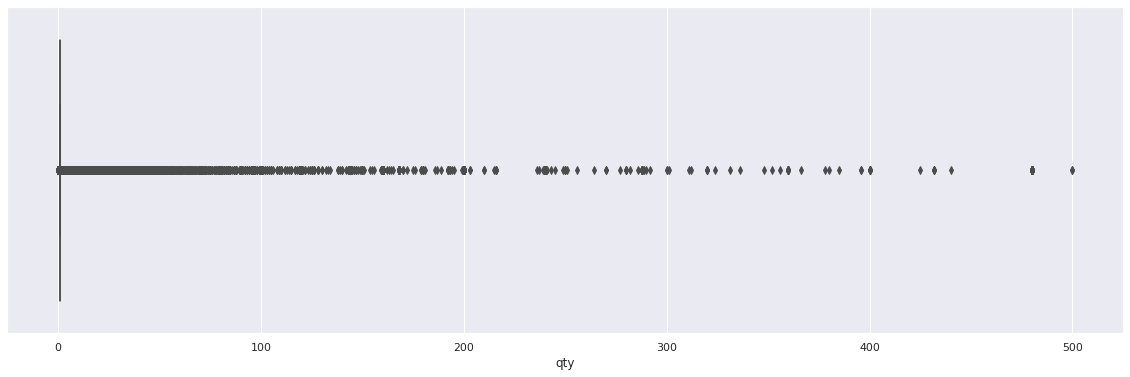

In [ ]:
ax = sns.boxplot(dflimit500['qty']) # limit qty 500

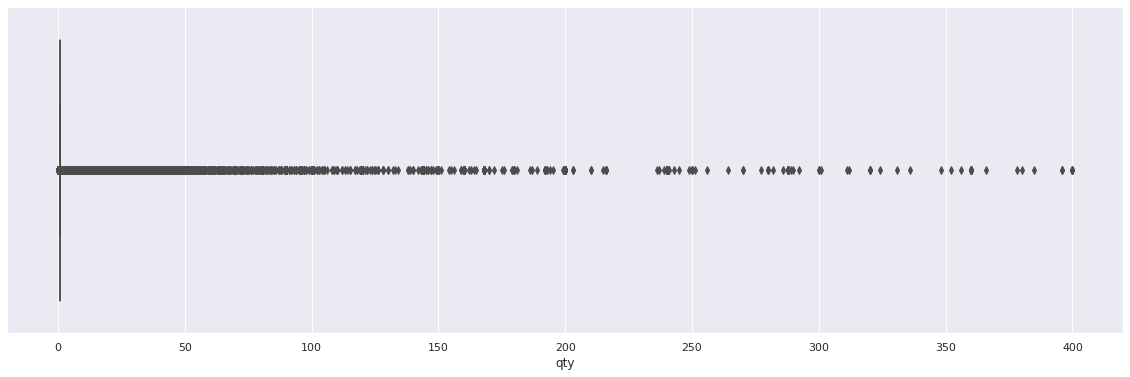

In [ ]:
ax = sns.boxplot(dflimit400['qty'] )# limit qty 400

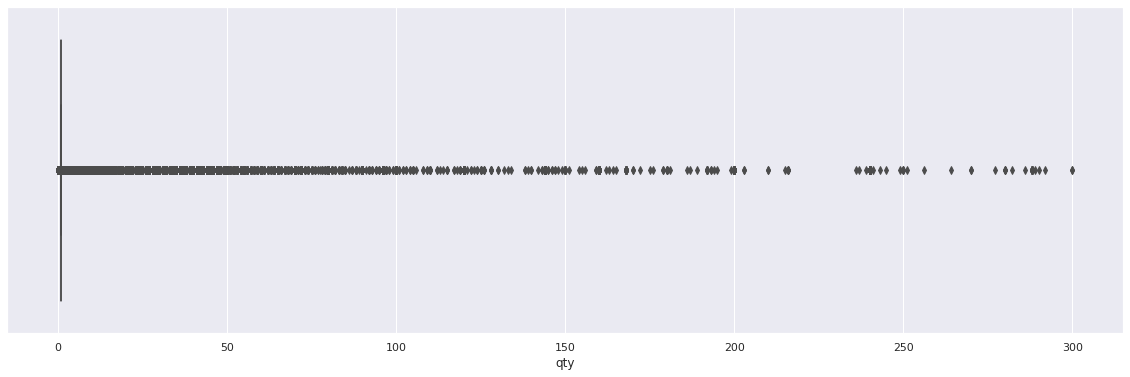

In [ ]:
ax = sns.boxplot(dflimit300['qty']) # limit qty 300

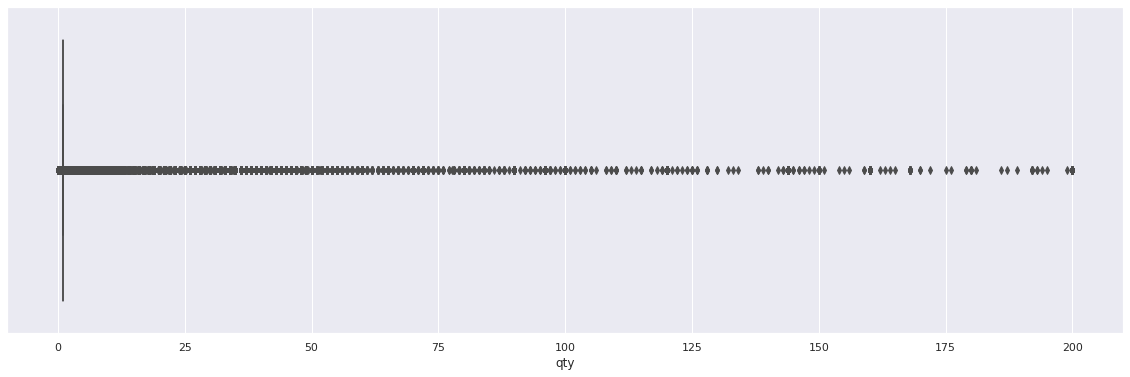

In [ ]:
ax = sns.boxplot(dflimit200['qty'] )# limit qty 200

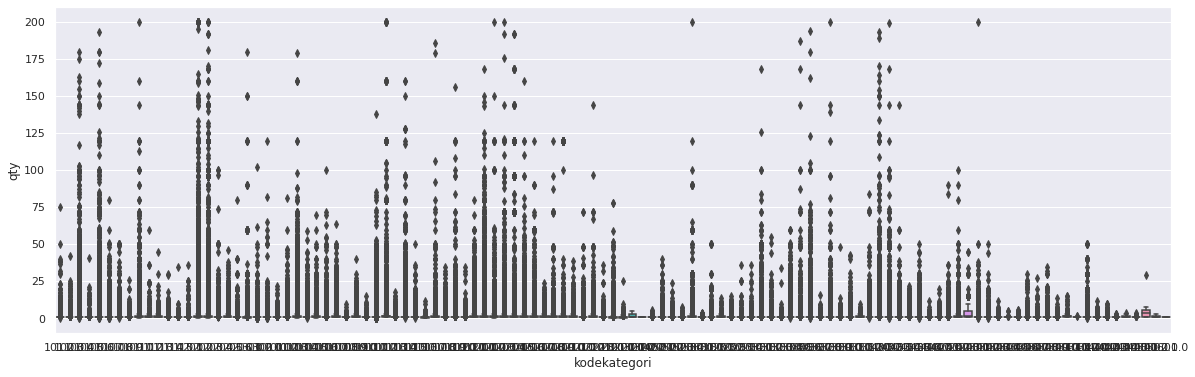

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='kodekategori', y='qty', data=dflimit200)

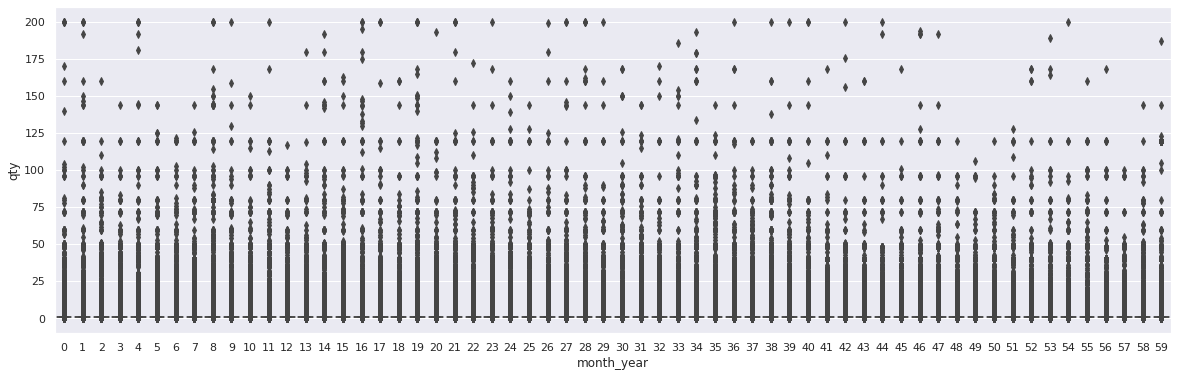

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='month_year', y='qty', data=dflimit200)

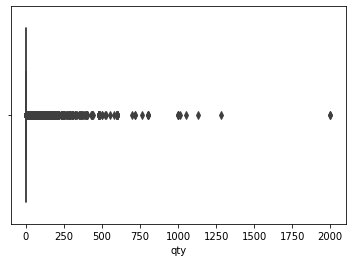

In [ ]:
# limit qty 2000
ax = sns.boxplot(df['qty'])

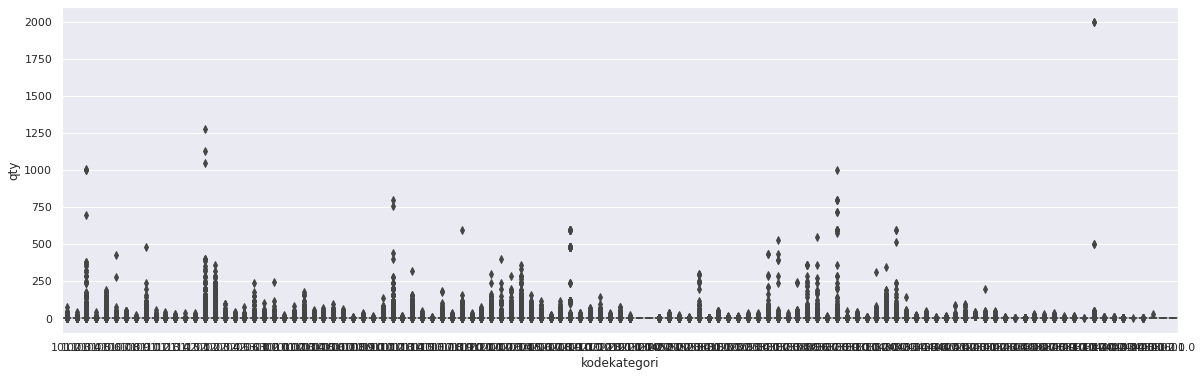

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='kodekategori', y='qty', data=df)

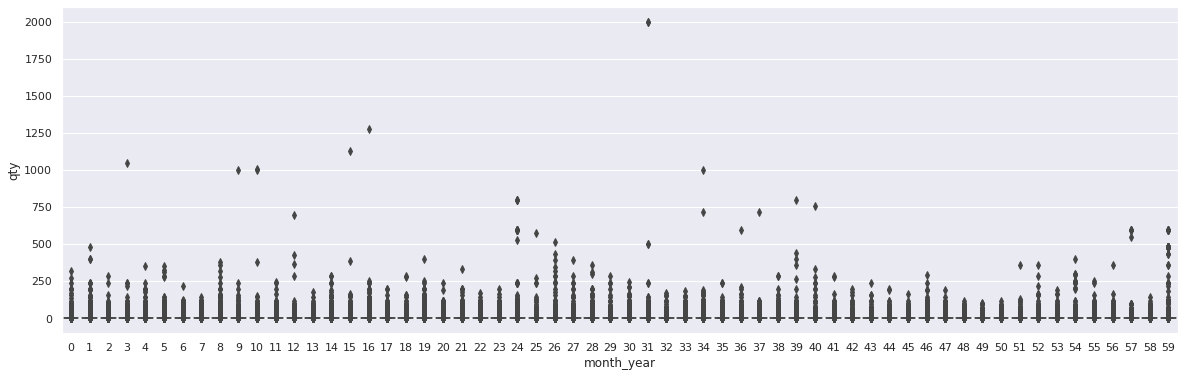

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='month_year', y='qty', data=df)

# Grafik loss

In [ ]:
mse_data = {
    'label': ['bs8_hn8', 'bs8_hn16', 'bs8_hn32', 'bs8_hn64', 'bs16_hn8', 'bs16_hn16', 'bs16_hn32', 'bs16_hn64', 'bs32_hn8', 'bs32_hn16', 'bs32_hn32', 'bs32_hn64', 'bs64_hn8', 'bs64_hn16', 'bs64_hn32', 'bs64_hn64'],
    'train_loss': [143.0221, 142.2886, 141.8339, 141.3339, 141.1122, 141.6289, 141.2016, 141.0043, 141.8690, 141.3768, 140.8004, 139.3680, 141.1476, 140.7559, 140.0804, 138.8019],
    'val_loss': [141.4689, 137.9702, 141.5539, 139.3387, 139.2211, 137.5091, 138.7038, 137.4425, 137.5619, 139.4229, 136.5194, 137.1299, 139.6360, 136.7161, 137.7550, 136.3658]}
df_mse = pd.DataFrame(mse_data)

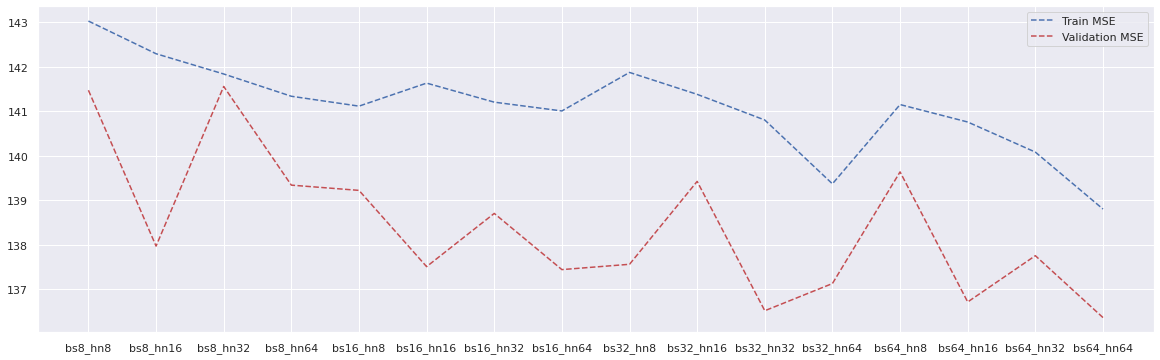

In [ ]:
plt.plot(df_mse.label, df_mse.train_loss, "--b", label="Train MSE")
plt.plot(df_mse.label, df_mse.val_loss, "--r", label="Validation MSE")
plt.legend(loc="upper right")
plt.show()

# fig, ax = plt.subplots(figsize=(16,5))
# width = 0.4
# plt.bar(df_mse.label, df_mse.train_loss,
#         width, color='tab:red', label='wine')
# plt.bar(df_mse.label, df_mse.val_loss,
#         width, color='gold', label='beer')
# plt.title('TOP5 countries by pure alcohol consumption', fontsize=25)
# plt.xlabel(None)
# plt.xticks(df_mse.index, df_mse['label'], fontsize=17)
# plt.ylabel('Servings per person', fontsize=20)
# plt.yticks(fontsize=17)
# sns.despine(bottom=True)
# ax.grid(False)
# ax.tick_params(bottom=False, left=True)
# plt.legend(frameon=False, fontsize=15)
# plt.show()

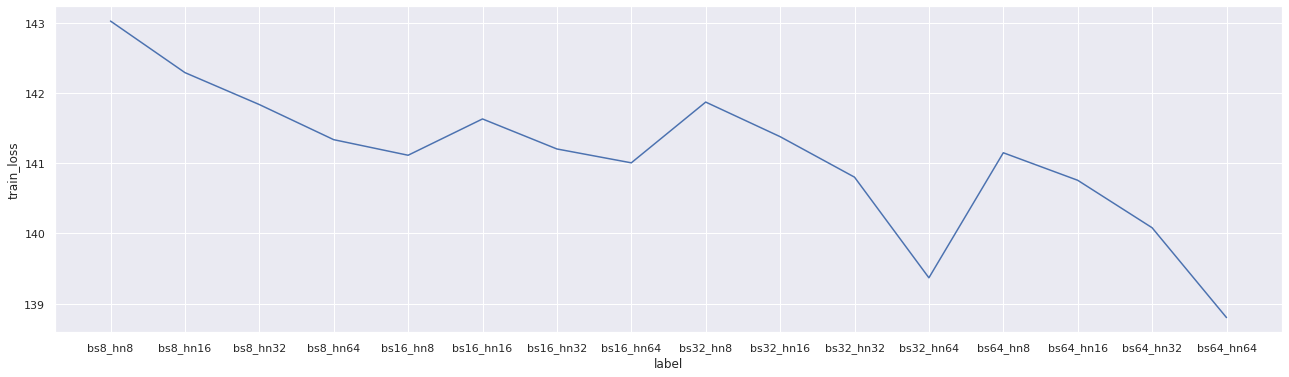

In [ ]:
sns.set(rc={'figure.figsize':(22,6)})
sns.lineplot(x="label", y="train_loss", data=df_mse)

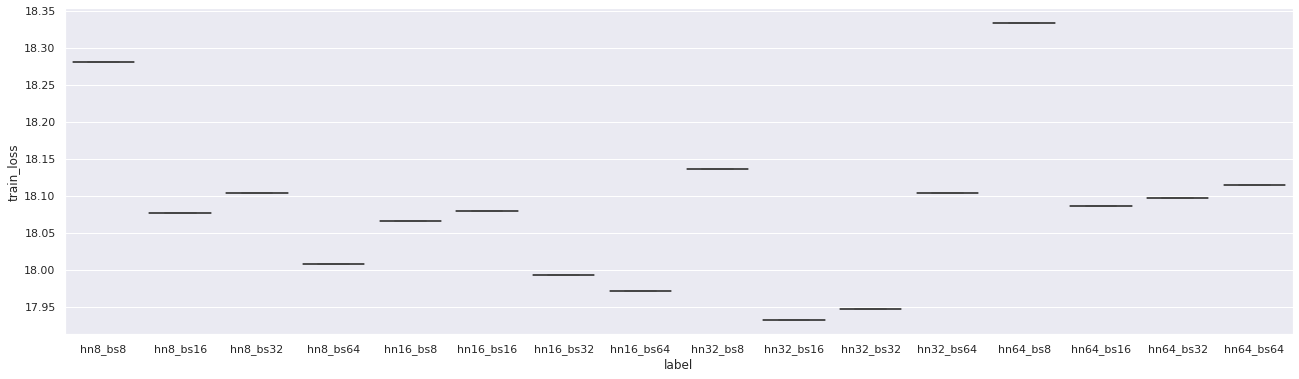

In [ ]:
sns.set(rc={'figure.figsize':(22,6)})
sns.boxplot(x='label', y='train_loss', data=df_mse)

# Find product for prediction 

In [ ]:
df2021 = pd.read_csv('./data-2021-renew.csv', parse_dates=['tgl'])
df2022 = pd.read_csv('./data-2022-renew.csv', parse_dates=['tgl'])

In [ ]:
# drop unnecessary column
df2021 = df2021.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2022 = df2022.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

In [ ]:
# concat 2 dataframe to single df
df_produk = pd.concat([df2021, df2022]).reset_index(drop=True)

In [ ]:
# remove strange value in each rows from barcode column
df_produk['barcode'] = df_produk['barcode'].str.split(' ').str[0]

In [ ]:
df_produk.head()

,tgl,namabarang,satuan,qty,barcode,kodecustomer,kodejenis,jenis,kodekategori,kategori
0,2021-09-27 19:14:48.620,MULTI TISSUE MP-08 1000GR 16,PCS,1.00,8992931025080,CU00000001,03030401,Facial Tissue,30304,Tisu & Kapas (Tissues & Cotton)
1,2021-01-25 15:21:13.593,ROMA KELAPA 24*300GR,PCS,2.00,8996001301142,CU00000001,01010305,Assorted,10103,Biskuit (Biscuit)
2,2021-04-01 17:41:02.013,INDOFOOD SAUCE TOMAT 140ML,PCS,1.00,089686401721,CU00000001,01011116,Saos Tomat (Tomato Ketchup),10111,Bumbu Dapur (Seasoning)
3,2021-04-02 19:06:08.733,BEAR BRAND 195GR*30,KLG,3.00,8992696404441,CU00000001,01020109,Susu Cair (RTD),10201,Susu (Milk)
4,2021-04-24 18:03:29.557,CHEETOS TWIS AYAM BKR 75GR*30,PCS,1.00,089686600100,CU00000001,01011401,Snack Modern,10114,Makanan Ringan (Snack)


In [ ]:
# drop unnesecary value from dataset 
df_produk = df_produk[df_produk['kodecustomer'].isin(['CU00000001'])].reset_index(drop=True)
# df_produk = df_produk[(df_produk['namabarang'].str.contains('TB')) & (df_produk['kategori'] == 'Homes (6)') & (df_produk['barcode'].isin(['56101','56102','56103','56104']))]
df_produk = df_produk[~df_produk['barcode'].isin(['56101','56102','56103','56104'])].reset_index(drop=True)
df_produk = df_produk[~df_produk['namabarang'].str.contains('JASA PENDINGIN')].reset_index(drop=True)
df_produk = df_produk[~df_produk['kategori'].str.contains('Toys', na=False)].reset_index(drop=True)
df_produk = df_produk[~df_produk['namabarang'].str.contains('ZANDILAC')].reset_index(drop=True)
# df_produk = df_produk.query('qty > 0 & qty <= 200').sort_values(by="qty", ascending=False).reset_index(drop=True)
# df_produk = df_produk.query('qty > 0 & qty <= 300').sort_values(by="qty", ascending=False).reset_index(drop=True)
df_produk = df_produk.query('qty > 0 & qty <= 400').sort_values(by="qty", ascending=False).reset_index(drop=True)
# df_produk = df_produk.query('qty > 0 & qty <= 500').sort_values(by="qty", ascending=False).reset_index(drop=True)

In [ ]:
# create new column named "month_year" to get number of month and year
df_produk['month_year'] = df_produk['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

In [ ]:
df_produk.head()

,tgl,namabarang,satuan,qty,barcode,kodecustomer,kodejenis,jenis,kodekategori,kategori,month_year
0,2021-07-04 19:25:58.237,NESCAFE 3IN1 ORIGINAL 17.5GR,PCS,400.00,8992696420557,CU00000001,01020203,Kopi Instant,10202,Kopi (Coffe),07-21
1,2022-02-26 08:49:20.597,NABATI RCO 127GR*24 MT,PCS,384.00,8993175537346,CU00000001,01010304,Wafer,10103,Biskuit (Biscuit),02-22
2,2021-12-16 14:56:42.353,PEPSODENT 120GR WHITE,PCS,360.00,8999999706173,CU00000001,03030501,Pasta Gigi,30305,Perawatan Gigi & Mulut (Oral Care),12-21
3,2021-12-16 16:03:08.467,PEPSODENT 120GR WHITE,PCS,360.00,8999999706173,CU00000001,03030501,Pasta Gigi,30305,Perawatan Gigi & Mulut (Oral Care),12-21
4,2021-09-23 08:29:10.507,CIPTADENT PG FRESH 75GR*72,PCS,360.00,8998866181068,CU00000001,03030501,Pasta Gigi,30305,Perawatan Gigi & Mulut (Oral Care),09-21


In [ ]:
# transform the value to number of month from all rows
2021-2022
df_produk['month_year'] = df_produk['month_year'].map({'01-21':0,'02-21':1,'03-21':2,'04-21':3,'05-21':4,'06-21':5,'07-21':6,'08-21':7,'09-21':8,'10-21':9,'11-21':10,'12-21':11,
                                          '01-22':12,'02-22':13,'03-22':14,'04-22':15})

In [ ]:
display(df_produk.info())
display(df_produk.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874215 entries, 0 to 1874214
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   tgl           datetime64[ns]
 1   namabarang    object        
 2   satuan        object        
 3   qty           float64       
 4   barcode       object        
 5   kodecustomer  object        
 6   kodejenis     object        
 7   jenis         object        
 8   kodekategori  int64         
 9   kategori      object        
 10  month_year    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 157.3+ MB


None

,tgl,namabarang,satuan,qty,barcode,kodecustomer,kodejenis,jenis,kodekategori,kategori,month_year
0,2021-07-04 19:25:58.237,NESCAFE 3IN1 ORIGINAL 17.5GR,PCS,400.00,8992696420557,CU00000001,01020203,Kopi Instant,10202,Kopi (Coffe),6
1,2022-02-26 08:49:20.597,NABATI RCO 127GR*24 MT,PCS,384.00,8993175537346,CU00000001,01010304,Wafer,10103,Biskuit (Biscuit),13
2,2021-12-16 14:56:42.353,PEPSODENT 120GR WHITE,PCS,360.00,8999999706173,CU00000001,03030501,Pasta Gigi,30305,Perawatan Gigi & Mulut (Oral Care),11
3,2021-12-16 16:03:08.467,PEPSODENT 120GR WHITE,PCS,360.00,8999999706173,CU00000001,03030501,Pasta Gigi,30305,Perawatan Gigi & Mulut (Oral Care),11
4,2021-09-23 08:29:10.507,CIPTADENT PG FRESH 75GR*72,PCS,360.00,8998866181068,CU00000001,03030501,Pasta Gigi,30305,Perawatan Gigi & Mulut (Oral Care),8


In [ ]:
train_monthly = df_produk[['tgl', 'month_year', 'kodejenis', 'barcode', 'qty']].copy()
train_monthly = train_monthly.sort_values('tgl').groupby(['month_year', 'kodejenis', 'barcode'], as_index=False)
train_monthly = train_monthly.agg({'qty':['sum']})
train_monthly.columns = ['month_year', 'kodejenis', 'barcode', 'qty_cnt']
# train_monthly = train_monthly.query('qty_cnt > 0 & qty_cnt <= 200')
# train_monthly = train_monthly.query('qty_cnt > 0 & qty_cnt <= 300')
train_monthly = train_monthly.query('qty_cnt > 0 & qty_cnt <= 400')
# train_monthly = train_monthly.query('qty_cnt > 0 & qty_cnt <= 500')

train_monthly['qty_cnt_month'] = train_monthly.sort_values('month_year').groupby(['barcode', 'kodejenis'])['qty_cnt'].shift(-1)

display(train_monthly.head())

,month_year,kodejenis,barcode,qty_cnt,qty_cnt_month
0,0,01010101,089686640007,16.00,9.00
1,0,01010101,089686640014,29.00,12.00
2,0,01010101,089686640038,21.00,8.00
3,0,01010101,089686640045,13.00,6.00
4,0,01010101,089686646047,12.00,5.00


In [ ]:
monthly_series = train_monthly.pivot_table(index=['barcode', 'kodejenis'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()
monthly_series.head()

month_year,barcode,kodejenis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,00100809,01011601,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59,5.67,2.89,0.30
1,00113731,02020101,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.75,0.78,0.45,1.72,0.32,0.87,0.00,0.00
2,00129213,02010113,38.39,60.46,1.95,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,00133173,02010137,178.80,140.58,197.99,0.00,165.40,66.73,53.37,47.26,224.66,189.91,0.00,180.94,112.43,90.20,16.02
4,00133210,02010113,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
monthly_series_drop = monthly_series.drop(['kodejenis'], axis=1)

In [ ]:
summed_data = monthly_series_drop.groupby('barcode').agg('sum').reset_index(False)
summed_data.head()

month_year,barcode,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,00100809,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59,5.67,2.89,0.30
1,00113731,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.75,0.78,0.45,1.72,0.32,0.87,0.00,0.00
2,00129213,38.39,60.46,1.95,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,00133173,178.80,140.58,197.99,0.00,165.40,66.73,53.37,47.26,224.66,189.91,0.00,180.94,112.43,90.20,16.02
4,00133210,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
new_df = summed_data[(summed_data[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]] != 0).all(axis=1)].reset_index(drop=True)
new_df.head()

month_year,barcode,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,00100809,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59,5.67,2.89,0.30
1,00133241,17.06,23.84,16.35,158.96,14.39,18.99,21.94,20.99,8.47,16.47,120.27,13.49,20.52,36.09,1.53
2,00133333,83.83,76.22,89.81,117.14,140.57,116.76,104.00,86.70,149.28,172.22,96.72,118.73,144.99,111.91,4.86
3,00149464,42.21,22.69,35.81,16.69,31.07,22.35,35.23,98.55,72.66,110.03,75.46,120.27,92.82,65.83,1.81
4,00156790,17.65,16.45,19.91,15.66,11.04,9.24,7.30,6.37,4.97,4.46,5.61,14.07,10.61,6.68,1.20


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   barcode  2694 non-null   object 
 1   0        2694 non-null   float64
 2   1        2694 non-null   float64
 3   2        2694 non-null   float64
 4   3        2694 non-null   float64
 5   4        2694 non-null   float64
 6   5        2694 non-null   float64
 7   6        2694 non-null   float64
 8   7        2694 non-null   float64
 9   8        2694 non-null   float64
 10  9        2694 non-null   float64
 11  10       2694 non-null   float64
 12  11       2694 non-null   float64
 13  12       2694 non-null   float64
 14  13       2694 non-null   float64
 15  14       2694 non-null   float64
dtypes: float64(15), object(1)
memory usage: 336.9+ KB


In [ ]:
# get the barcode
barcode_500list = new_df.iloc[:500]
# barcode_500list.head()
barcode_list = barcode_500list['barcode'].to_list()

In [ ]:
df_barcode = pd.concat([df2021, df2022]).reset_index(drop=True)

In [ ]:
df_barcode = df_barcode[df_barcode['barcode'].isin(barcode_list)].reset_index(drop=True)
df_barcode.head()

,tgl,namabarang,satuan,qty,barcode,kodecustomer,kodejenis,jenis,kodekategori,kategori
0,2021-04-01 17:41:02.013,INDOFOOD SAUCE TOMAT 140ML,PCS,1.00,089686401721,CU00000001,01011116,Saos Tomat (Tomato Ketchup),10111,Bumbu Dapur (Seasoning)
1,2021-02-13 17:26:15.373,SAWARGI BAWANG GORENG 100GR,PCS,1.00,56212,CU00000001,01011002,Bawang Goreng,10110,Makanan Masak (Cooked Food)
2,2021-01-17 10:22:41.090,SUSEMI SABUT POLOS,PCS,1.00,16453,CU00000001,04030101,Peralatan Kebersihan Rumah,40301,Rumah Tangga (House Hold)
3,2021-07-07 13:23:42.680,SWALLOW TOILET BALL 3,PCS,1.00,8886020001089,CU00000001,03040402,Pengaharum Kamar Mandi,30404,Pengharum Rumah (Home Fragrances)
4,2021-09-16 17:14:21.070,TELOR AYAM PAK,PAK,1.00,14911,CU00000001,02050401,Telur Ayam,20504,Telur (Egg)


In [ ]:
# get barcode & namabarang column for grouping on next step 
dfd = df_barcode.drop(['kategori','kodekategori','jenis','kodejenis','kodecustomer','qty','satuan','tgl'], axis=1)

In [ ]:
df_pred_grouped = dfd.groupby('barcode').first().reset_index()
product_list = df_pred_grouped['barcode'].to_list()
namabarang = df_pred_grouped['namabarang'].to_list()

# Test - web fix

In [ ]:
# data preprocessing for prediction january 2022

testing = df2021.copy()

testing['month_year'] = testing['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

testing['month_year'] = testing['month_year'].map({'01-21':0,'02-21':1,'03-21':2,'04-21':3,'05-21':4,'06-21':5,'07-21':6,'08-21':7,'09-21':8,'10-21':9,'11-21':10,'12-21':11})
# testing['month_year'] = testing['month_year'].map({'01-21':'Januari','02-21':'Februari','03-21':'Maret','04-21':'April','05-21':'Mei','06-21':'Juni','07-21':'Juli','08-21':'Agustus','09-21':'September','10-21':"Oktober",'11-21':'November','12-21':'Desember'})

test_monthly = testing[['tgl', 'month_year', 'barcode', 'qty']]
test_monthly = test_monthly.sort_values('tgl').groupby(['month_year', 'barcode'], as_index=False)
test_monthly = test_monthly.agg({'qty':['sum']})
test_monthly.columns = ['month_year', 'barcode', 'qty_cnt']
test_monthly = test_monthly.query('qty_cnt >= 0 and qty_cnt <= 400')

# Label
test_monthly['qty_cnt_month'] = test_monthly.sort_values('month_year').groupby(['barcode'])['qty_cnt'].shift(-1)

test_monthly_series = test_monthly.pivot_table(index=['barcode'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()

In [ ]:
# display(test_monthly_series.nunique())
display(test_monthly_series.head())

month_year,barcode,0,1,2,3,4,5,6,7,8,9,10,11
0,00100809,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,00113731,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.75,0.78,0.45,1.72,0.32
2,00129213,38.39,60.46,1.95,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,00133173,178.80,140.58,197.99,0.00,165.40,66.73,53.37,47.26,224.66,189.91,0.00,180.94
4,00133210,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# data preprocessing for prediction february 2022

testing_pred = df2022.copy()

# testing_pred = testing_pred.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

testing_pred['month_year'] = testing_pred['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

testing_pred['month_year'] = testing_pred['month_year'].map({'01-22':0,'02-22':1})

testing_monthly_pred = testing_pred[['tgl', 'month_year', 'barcode', 'qty']]
testing_monthly_pred = testing_monthly_pred.sort_values('tgl').groupby(['month_year', 'barcode'], as_index=False)
testing_monthly_pred = testing_monthly_pred.agg({'qty':['sum']})
testing_monthly_pred.columns = ['month_year', 'barcode', 'qty_cnt']
testing_monthly_pred = testing_monthly_pred.query('qty_cnt >= 0 and qty_cnt <= 400')
# testing_monthly_pred = testing_monthly_pred.query('qty_cnt >= 0')

# Label
testing_monthly_pred['qty_cnt_month'] = testing_monthly_pred.sort_values('month_year').groupby(['barcode'])['qty_cnt'].shift(-1)

testing_monthly_series_pred = testing_monthly_pred.pivot_table(index=['barcode'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()

In [ ]:
print(f"Min date from data set: {testing_pred['tgl'].min().date()}")
print(f"Max date from data set: {testing_pred['tgl'].max().date()}")
print("Prediksi bulan januari & februari, karena penjualan bulan maret hanya tercatat pada tanggal 1")

Min date from data set: 2022-01-01
Max date from data set: 2022-03-01
Prediksi bulan januari & februari, karena penjualan bulan maret hanya tercatat pada tanggal 1


In [ ]:
testing_monthly_series_pred.head()

month_year,barcode,0.0,1.0
0,00100809,5.67,2.89
1,00113731,0.87,0.00
2,00133173,112.43,90.20
3,00133227,67.36,93.50
4,00133241,20.52,36.09


In [ ]:
# pred_list = ['96770', '011747234207', '96842', '97162', '8992933211115', '8999999195670', '00100809', '9557062331128', '97515', '00149457']
# df_pred_list = df[df['barcode'].isin(pred_list)].reset_index(drop=True)

In [ ]:
# df_pred_grouped = df_pred_list.groupby(["barcode", "namabarang"]).size().reset_index().rename(columns={0:'count'})
# product_list = df_pred_grouped['barcode'].to_list()
# namabarang = df_pred_grouped['namabarang'].to_list()

In [ ]:
# get data selected product list from 2021 and 2022 for ploting on website

# product_list = ['011747233057', '011747234207', '055500130221']
# namabarang = ['DUA KELINCI KCG.GRG 10*750GR', 'DOLPIN GARAM 1000GR*12', 'SOS P.LANTAI ORANGE 750ML REFF']

selected_data_2021 = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True)
selected_data_2022 = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True)
selected_data_2021['namabarang'] = namabarang
selected_data_2022['namabarang'] = namabarang
selected_data_2021 = selected_data_2021[['barcode', 'namabarang', 0, 1, 2, 3,  4, 5, 6, 7, 8, 9, 10, 11]]
selected_data_2022 = selected_data_2022[['barcode', 'namabarang', 0, 1]]
selected_data_2021.rename(columns = {0:'Januari', 1:'Februari', 2:'Maret', 3:'April', 4:'Mei', 5:'Juni', 6:'Juli', 7:'Agustus', 8:'September', 9:'Oktober', 10:'November', 11:'Desember'}, inplace = True)
selected_data_2022.rename(columns = {0:'Januari', 1:'Februari'}, inplace = True)
# selected_data_2022.drop(['barcode', 'kodejenis'], axis=1, inplace=True)
# appenned_data = df.append()
# # df_train_raw.to_csv('df_train_raw_new.csv', index=False)
display(selected_data_2021.head(10))
display(selected_data_2022.head(10))
# display(appenned_data)

month_year,barcode,namabarang,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,00100809,KACANG HIJAU / KG,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,00133241,APEL TOP RED/KG*19,17.06,23.84,16.35,158.96,14.39,18.99,21.94,20.99,8.47,16.47,120.27,13.49
2,00133333,SEMANGKA MERAH/KG,83.83,76.22,89.81,117.14,140.57,116.76,104.00,86.70,149.28,172.22,96.72,118.73
3,00149464,PEPAYA CALIFORNIA,42.21,22.69,35.81,16.69,31.07,22.35,35.23,98.55,72.66,110.03,75.46,120.27
4,00156790,BAWANG MERAH CURAH/KG,17.65,16.45,19.91,15.66,11.04,9.24,7.30,6.37,4.97,4.46,5.61,14.07
5,00156806,BAWANG PUTIH CURAH/KG,10.12,11.23,11.67,14.50,11.22,4.70,4.82,7.63,5.92,5.07,4.41,7.96
6,00172677,KOL PUTIH/KG,3.96,4.06,9.76,6.92,9.30,7.72,14.58,9.38,10.64,6.17,16.70,8.81
7,00172790,TOMAT CURAH/KG,14.17,10.26,20.55,16.06,13.82,5.90,11.81,3.60,5.74,9.18,7.72,10.91
8,00217071,PISANG CAVENDIS/KG*13,102.30,100.47,93.74,103.33,80.22,95.43,102.08,89.54,81.10,105.53,88.46,99.91
9,00241762,SALAK BALI / KG,11.83,8.23,7.38,23.60,2.60,6.16,5.71,6.60,10.12,3.38,6.89,1.93


month_year,barcode,namabarang,Januari,Februari
0,00100809,KACANG HIJAU / KG,5.67,2.89
1,00133241,APEL TOP RED/KG*19,20.52,36.09
2,00133333,SEMANGKA MERAH/KG,144.99,111.91
3,00149464,PEPAYA CALIFORNIA,92.82,65.83
4,00156790,BAWANG MERAH CURAH/KG,10.61,6.68
5,00156806,BAWANG PUTIH CURAH/KG,8.20,13.25
6,00172677,KOL PUTIH/KG,5.70,7.80
7,00172790,TOMAT CURAH/KG,13.59,7.58
8,00217071,PISANG CAVENDIS/KG*13,98.43,99.53
9,00241762,SALAK BALI / KG,2.52,5.64


In [ ]:
# import the product data to csv 
# selected_data_2021.to_csv('riwayat_pred_jan_500barcode.csv', index=False)
# selected_data_2021.drop(['Januari'], axis=1, inplace=True)
# selected_data_2021['Januari'] = selected_data_2022['Januari']
# selected_data_2021.to_csv('riwayat_pred_feb_500barcode.csv', index=False)

In [ ]:
selected_data_2021.head(10)

month_year,barcode,namabarang,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,00100809,KACANG HIJAU / KG,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,00133241,APEL TOP RED/KG*19,17.06,23.84,16.35,158.96,14.39,18.99,21.94,20.99,8.47,16.47,120.27,13.49
2,00133333,SEMANGKA MERAH/KG,83.83,76.22,89.81,117.14,140.57,116.76,104.00,86.70,149.28,172.22,96.72,118.73
3,00149464,PEPAYA CALIFORNIA,42.21,22.69,35.81,16.69,31.07,22.35,35.23,98.55,72.66,110.03,75.46,120.27
4,00156790,BAWANG MERAH CURAH/KG,17.65,16.45,19.91,15.66,11.04,9.24,7.30,6.37,4.97,4.46,5.61,14.07
5,00156806,BAWANG PUTIH CURAH/KG,10.12,11.23,11.67,14.50,11.22,4.70,4.82,7.63,5.92,5.07,4.41,7.96
6,00172677,KOL PUTIH/KG,3.96,4.06,9.76,6.92,9.30,7.72,14.58,9.38,10.64,6.17,16.70,8.81
7,00172790,TOMAT CURAH/KG,14.17,10.26,20.55,16.06,13.82,5.90,11.81,3.60,5.74,9.18,7.72,10.91
8,00217071,PISANG CAVENDIS/KG*13,102.30,100.47,93.74,103.33,80.22,95.43,102.08,89.54,81.10,105.53,88.46,99.91
9,00241762,SALAK BALI / KG,11.83,8.23,7.38,23.60,2.60,6.16,5.71,6.60,10.12,3.38,6.89,1.93


In [ ]:
# get 5 products for prediction

# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True) # 2021 data
# df_pred_2022 = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True) # 2022 data
# df_pred = df_pred.drop_duplicates(subset=['barcode', 'kodejenis'])
# df_pred.fillna(0, inplace=True)
# df_pred.drop(['barcode', 'kodejenis'], axis=1, inplace=True)

In [ ]:
# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred_jan = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True)
# df_pred_jan.drop(['kodejenis'], axis=1, inplace=True)
# df_pred_jan.drop([0], axis=1, inplace=True)
# df_pred_jan.head()
# df_pred_jan.to_csv('df_pred_jan.csv', index=False)

In [ ]:
# get 5 products for prediction

# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred_feb = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True)
# df_pred_feb.drop(['kodejenis'], axis=1, inplace=True)
# df_pred_feb
# df_pred_feb[0]
# df_pred_jan[12] = df_pred_feb[0]
# df_pred_jan
# df_pred_jan.to_csv('df_pred_feb.csv', index=False)

In [ ]:
# df_pred.to_csv('df_pred.csv', index=False)

In [ ]:
# import dataset for prediction
jan = pd.read_csv('./riwayat_pred_jan_500barcode.csv')
feb = pd.read_csv('./riwayat_pred_feb_500barcode.csv')

In [ ]:
# drop unnecessary column

X_jan = jan.drop_duplicates(subset=['barcode'])
X_jan.fillna(0, inplace=True)
X_jan.drop(['barcode', 'namabarang'], axis=1, inplace=True)

X_feb = feb.drop_duplicates(subset=['barcode'])
X_feb.fillna(0, inplace=True)
X_feb.drop(['barcode', 'namabarang'], axis=1, inplace=True)

In [ ]:
display(X_jan.head())
display(X_feb.head())

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,17.06,23.84,16.35,158.96,14.39,18.99,21.94,20.99,8.47,16.47,120.27,13.49
2,83.83,76.22,89.81,117.14,140.57,116.76,104.00,86.70,149.28,172.22,96.72,118.73
3,42.21,22.69,35.81,16.69,31.07,22.35,35.23,98.55,72.66,110.03,75.46,120.27
4,17.65,16.45,19.91,15.66,11.04,9.24,7.30,6.37,4.97,4.46,5.61,14.07


,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari
0,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59,5.67
1,23.84,16.35,158.96,14.39,18.99,21.94,20.99,8.47,16.47,120.27,13.49,20.52
2,76.22,89.81,117.14,140.57,116.76,104.00,86.70,149.28,172.22,96.72,118.73,144.99
3,22.69,35.81,16.69,31.07,22.35,35.23,98.55,72.66,110.03,75.46,120.27,92.82
4,16.45,19.91,15.66,11.04,9.24,7.30,6.37,4.97,4.46,5.61,14.07,10.61


In [ ]:
# reshape the predict dataset

X_reshaped_jan = X_jan.values.reshape((X_jan.shape[0], X_jan.shape[1], 1))
display(X_reshaped_jan.shape)

X_reshaped_feb = X_feb.values.reshape((X_feb.shape[0], X_feb.shape[1], 1))
display(X_reshaped_feb.shape)

(500, 12, 1)

(500, 12, 1)

In [ ]:
# LIMIT 500
# gru_model = load_model('gru_model-bs64_hn64_month0_year2017-2021_limit500.h5') # sudah
# gru_model = load_model('gru_model-bs64_hn64_month0_year2018-2021_limit500.h5') # sudah
# gru_model = load_model('gru_model-bs64_hn64_month0_year2019-2021_limit500.h5') # sudah
# gru_model = load_model('gru_model-bs64_hn64_month0_year2020-2021_limit500.h5') # sudah

# LIMIT 400
gru_model = load_model('gru_model-bs64_hn64_month0_year2017-2021_limit400.h5') # sudah
# gru_model = load_model('gru_model-bs64_hn64_month0_year2018-2021_limit400.h5') # sudah
# gru_model = load_model('gru_model-bs64_hn64_month0_year2019-2021_limit400.h5') # sudah
# gru_model = load_model('gru_model-bs64_hn64_month0_year2020-2021_limit400.h5') # sudah

# LIMIT 300
# gru_model = load_model('gru_model-bs64_hn64_month0_year2017-2021_limit300.h5') # sudah
# gru_model = load_model('gru_model-bs64_hn64_month0_year2018-2021_limit300.h5') # sudah
# gru_model = load_model('gru_model-bs64_hn64_month0_year2019-2021_limit300.h5') # sudah
# gru_model = load_model('gru_model-bs64_hn64_month0_year2020-2021_limit300.h5') # sudah

In [ ]:
# predict the dataset

model_pred_jan = gru_model.predict(X_reshaped_jan)
model_pred_feb = gru_model.predict(X_reshaped_feb)

In [ ]:
# get back the barcode to pairing the prediction

barcode_pred_jan = jan[['barcode', 'namabarang']]
barcode_pred_feb = feb[['barcode', 'namabarang']]

prediction_jan = pd.DataFrame(barcode_pred_jan[['barcode', 'namabarang']], columns=['barcode', 'namabarang'])
prediction_jan['prediction_january'] = pd.DataFrame(model_pred_jan)

prediction_feb = pd.DataFrame(barcode_pred_feb[['barcode', 'namabarang']], columns=['barcode', 'namabarang'])
prediction_feb['prediction_february'] = pd.DataFrame(model_pred_feb)

In [ ]:
# prediction_jan.to_csv('pred_result_jan_2022.csv', index=False)
# prediction_feb.to_csv('pred_result_feb_2022.csv', index=False)

In [ ]:
display(prediction_jan.head(30))
display(prediction_feb.head(30))

,barcode,namabarang,prediction_january
0,100809,KACANG HIJAU / KG,3.34
1,133241,APEL TOP RED/KG*19,17.55
2,133333,SEMANGKA MERAH/KG,108.62
3,149464,PEPAYA CALIFORNIA,77.79
4,156790,BAWANG MERAH CURAH/KG,9.14
5,156806,BAWANG PUTIH CURAH/KG,6.68
6,172677,KOL PUTIH/KG,9.29
7,172790,TOMAT CURAH/KG,9.33
8,217071,PISANG CAVENDIS/KG*13,91.54
9,241762,SALAK BALI / KG,5.02


,barcode,namabarang,prediction_february
0,100809,KACANG HIJAU / KG,3.76
1,133241,APEL TOP RED/KG*19,21.05
2,133333,SEMANGKA MERAH/KG,119.13
3,149464,PEPAYA CALIFORNIA,73.45
4,156790,BAWANG MERAH CURAH/KG,9.36
5,156806,BAWANG PUTIH CURAH/KG,7.13
6,172677,KOL PUTIH/KG,8.21
7,172790,TOMAT CURAH/KG,10.20
8,217071,PISANG CAVENDIS/KG*13,93.30
9,241762,SALAK BALI / KG,4.65


In [ ]:
selected_data_2022.head()

month_year,barcode,namabarang,Januari,Februari
0,00100809,KACANG HIJAU / KG,5.67,2.89
1,00133241,APEL TOP RED/KG*19,20.52,36.09
2,00133333,SEMANGKA MERAH/KG,144.99,111.91
3,00149464,PEPAYA CALIFORNIA,92.82,65.83
4,00156790,BAWANG MERAH CURAH/KG,10.61,6.68


In [ ]:
# list_pred_jan = prediction_jan['prediction_january'].to_list()
# list_pred_feb = prediction_feb['prediction_february'].to_list()
jan_iloc = prediction_jan.iloc[20:30, 2:]
list_pred_jan = jan_iloc['prediction_january'].tolist()
feb_iloc = prediction_feb.iloc[20:30, 2:]
list_pred_feb = feb_iloc['prediction_february'].tolist()

jan_act_iloc = selected_data_2022.iloc[20:30, 2:3]
list_act_jan = jan_act_iloc['Januari'].tolist()
feb_act_iloc = selected_data_2022.iloc[20:30, 3:4]
list_act_feb = feb_act_iloc['Februari'].tolist()

barcode_iloc = prediction_feb.iloc[20:30, :1]
list_barcode = barcode_iloc['barcode'].tolist()
namabarang_iloc = prediction_feb.iloc[20:30, 1:2]
list_namabarang = namabarang_iloc['namabarang'].tolist()

In [ ]:
# display(prediction_jan['prediction_january'].head(10))
# display(prediction_feb['prediction_february'].head(10))

In [ ]:
df_pred_plot = pd.DataFrame(
  {
    'barcode': list_barcode,
    'namabarang': list_namabarang,
    'aktual_januari': list_act_jan,
    'peramalan_januari': list_pred_jan,
    'aktual_februari': list_act_feb,
    'peramalan_februari': list_pred_feb
  }
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

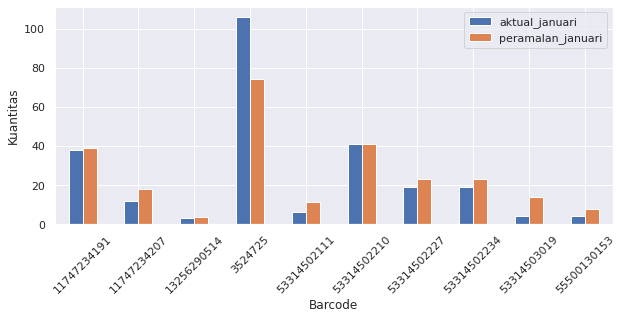

In [ ]:
plot_pred_jan = df_pred_plot[['barcode','aktual_januari','peramalan_januari']]
plot_pred_jan.plot(x="barcode", y=["aktual_januari", "peramalan_januari"], kind="bar", figsize=(10,4))
# plt.title('Plot Perbandingan Peramalan 10 Produk Teratas Bulan Januari 2022 ', fontsize=16)
plt.xlabel('Barcode')
plt.ylabel('Kuantitas')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

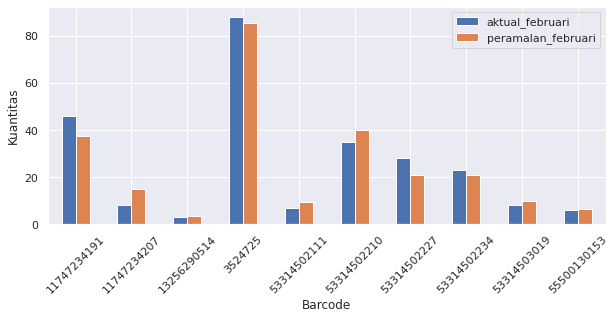

In [ ]:
plot_pred_jan = df_pred_plot[['barcode','aktual_februari','peramalan_februari']]
plot_pred_jan.plot(x="barcode", y=["aktual_februari", "peramalan_februari"], kind="bar", figsize=(10,4))
# plt.title('Plot Perbandingan Peramalan 10 Produk Teratas Bulan Februari 2022 ', fontsize=16)
plt.xlabel('Barcode')
plt.ylabel('Kuantitas')
plt.xticks(rotation=45)

In [ ]:
pred_jan = prediction_jan["prediction_january"]
pred_feb = prediction_feb["prediction_february"]

In [ ]:
actual_jan = selected_data_2022['Januari']
actual_feb = selected_data_2022['Februari']

In [ ]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
mape_january = mape(actual_jan, pred_jan)
mape_february = mape(actual_feb, pred_feb)
print('Mape Januari ', mape_january)
print('Mape Februari ', mape_february)
# Mape Januari  35.92097828857409
# Mape Februari  39.06126627670397

Mape Januari  35.92097828857409
Mape Februari  39.06126627670397


In [ ]:
print('Prediction rmse january:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse february:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))
# Prediction rmse january: 14.460859535461058
# Prediction rmse february: 14.588292986159157

Prediction rmse january: 14.460859535461058
Prediction rmse february: 14.588292986159157


In [ ]:
jan.head()

,barcode,namabarang,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,100809,KACANG HIJAU / KG,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,133241,APEL TOP RED/KG*19,17.06,23.84,16.35,158.96,14.39,18.99,21.94,20.99,8.47,16.47,120.27,13.49
2,133333,SEMANGKA MERAH/KG,83.83,76.22,89.81,117.14,140.57,116.76,104.00,86.70,149.28,172.22,96.72,118.73
3,149464,PEPAYA CALIFORNIA,42.21,22.69,35.81,16.69,31.07,22.35,35.23,98.55,72.66,110.03,75.46,120.27
4,156790,BAWANG MERAH CURAH/KG,17.65,16.45,19.91,15.66,11.04,9.24,7.30,6.37,4.97,4.46,5.61,14.07


In [ ]:
feb.head()

,barcode,namabarang,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari
0,100809,KACANG HIJAU / KG,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59,5.67
1,133241,APEL TOP RED/KG*19,23.84,16.35,158.96,14.39,18.99,21.94,20.99,8.47,16.47,120.27,13.49,20.52
2,133333,SEMANGKA MERAH/KG,76.22,89.81,117.14,140.57,116.76,104.00,86.70,149.28,172.22,96.72,118.73,144.99
3,149464,PEPAYA CALIFORNIA,22.69,35.81,16.69,31.07,22.35,35.23,98.55,72.66,110.03,75.46,120.27,92.82
4,156790,BAWANG MERAH CURAH/KG,16.45,19.91,15.66,11.04,9.24,7.30,6.37,4.97,4.46,5.61,14.07,10.61


# Limit500

In [ ]:
def mape(actual, pred): # gru_model-bs64_hn64_month0_year2017-2021_limit500.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)

44.2100411182993

In [ ]:
print('Prediction rmse january:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse february:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse january: 6.18937907730305
Prediction rmse february: 5.632216319888442


In [ ]:
def mape(actual, pred): # gru_model-bs64_hn64_month0_year2018-2021_limit500.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)

43.11141003396916

In [ ]:
print('Prediction rmse january:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse february:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse january: 6.397627242318995
Prediction rmse february: 5.880360158347457


In [ ]:
def mape(actual, pred): # gru_model-bs64_hn64_month0_year2019-2021_limit500.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)

43.04515146959468

In [ ]:
print('Prediction rmse january:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse february:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse january: 6.643185627841094
Prediction rmse february: 6.043921998812609


In [ ]:
def mape(actual, pred): # gru_model-bs64_hn64_month0_year2020-2021_limit500.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)

42.86995032894428

In [ ]:
print('Prediction rmse january:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse february:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse january: 6.675739715666707
Prediction rmse february: 6.109955114131446


# Limit400

In [ ]:
def mape(actual, pred): # gru_model-bs64_hn64_month0_year2017-2021_limit400.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)

43.73134868177574

In [ ]:
print('Prediction rmse january:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse february:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse january: 6.331076068911449
Prediction rmse february: 6.051827791103639


In [ ]:
def mape(actual, pred): # gru_model-bs64_hn64_month0_year2018-2021_limit400.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)

43.68184138269718

In [ ]:
print('Prediction rmse january:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse february:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse january: 6.492219421722422
Prediction rmse february: 5.861151516275494


In [ ]:
def mape(actual, pred): # gru_model-bs64_hn64_month0_year2019-2021_limit400.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)

44.17619048114466

In [ ]:
print('Prediction rmse january:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse february:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse january: 6.604156826263298
Prediction rmse february: 5.666007215825768


In [ ]:
def mape(actual, pred): # gru_model-bs64_hn64_month0_year2020-2021_limit400.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)

43.641308467947404

In [ ]:
print('Prediction rmse january:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse february:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse january: 6.847215934156786
Prediction rmse february: 5.923340885492561


# Limit300

In [ ]:
def mape(actual, pred): # gru_model-bs64_hn64_month0_year2017-2021_limit300.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)

43.60077080651293

In [ ]:
print('Prediction rmse january:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse february:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse january: 6.592482517986325
Prediction rmse february: 6.006683001627448


In [ ]:
def mape(actual, pred): # gru_model-bs64_hn64_month0_year2018-2021_limit300.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)

44.558064652522575

In [ ]:
print('Prediction rmse january:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse february:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse january: 6.672829911475037
Prediction rmse february: 5.759111894187176


In [ ]:
def mape(actual, pred): # gru_model-bs64_hn64_month0_year2019-2021_limit300.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)

42.954272096973526

In [ ]:
print('Prediction rmse january:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse february:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse january: 6.950016648845119
Prediction rmse february: 5.699917345255766


In [ ]:
def mape(actual, pred): # gru_model-bs64_hn64_month0_year2020-2021_limit300.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)

43.03019651684476

In [ ]:
print('Prediction rmse january:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse february:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse january: 6.668519033814687
Prediction rmse february: 6.111990533998993


# Limit & unlimit

In [ ]:
def mape(actual, pred): #gru_model-bs32_hn64_month0_year2018-2021_limit.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)
# mape(actual_feb, pred_feb)

43.57526870641458

In [ ]:
print('Prediction rmse:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse: 6.563081560502857
Prediction rmse: 6.298820322517257


In [ ]:
def mape(actual, pred): #gru_model-bs32_hn64_month0_year2018-2021_unlimit.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)

44.3284728843753

In [ ]:
print('Prediction rmse:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse: 6.43022532315772
Prediction rmse: 5.70193745538764


# Loading data

In [ ]:
# df2015 = pd.read_csv('./data-2015-renew.csv')
df2016 = pd.read_csv('./data-2016-renew.csv', parse_dates=['tgl'])
df2017 = pd.read_csv('./data-2017-renew.csv', parse_dates=['tgl'])
df2018 = pd.read_csv('./data-2018-renew.csv', parse_dates=['tgl'])
df2019 = pd.read_csv('./data-2019-renew.csv', parse_dates=['tgl'])
df2020 = pd.read_csv('./data-2020-renew.csv', parse_dates=['tgl'])
df2021 = pd.read_csv('./data-2021-renew.csv', parse_dates=['tgl'])
df2022 = pd.read_csv('./data-2022-renew.csv', parse_dates=['tgl'])

In [ ]:
product_list = ['011747233057', '011747234207', '055500130221']

selected_data_2021 = df2021[df2021['barcode'].isin(product_list)].reset_index(drop=True)
namabarang = ['DUA KELINCI KCG.GRG 10*750GR', 'DOLPIN GARAM 1000GR*12', 'SOS P.LANTAI ORANGE 750ML REFF']

In [ ]:
# drop unnecessary column

# df2016 = df2016.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2017 = df2017.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2018 = df2018.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2019 = df2019.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2020 = df2020.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2021 = df2021.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2022 = df2022.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

In [ ]:
df = pd.concat([df2017, df2018, df2019, df2020, df2021])
# df = pd.concat([df2017, df2018, df2019, df2020, df2021, df2022])
# df = pd.concat([df2021, df2022])
df['year_month'] = df['tgl'].apply(lambda x: x.strftime('%Y-%m')).astype(str)
df['month_yr'] = df['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)
# 2017-2021
df['month_yr'] = df['month_yr'].map({'01-17':0,'02-17':1,'03-17':2,'04-17':3,'05-17':4,'06-17':5,'07-17':6,'08-17':7,'09-17':8,'10-17':9,'11-17':10,'12-17':11,
                                          '01-18':12,'02-18':13,'03-18':14,'04-18':15,'05-18':16,'06-18':17,'07-18':18,'08-18':19,'09-18':20,'10-18':21,'11-18':22,'12-18':23,
                                          '01-19':24,'02-19':25,'03-19':26,'04-19':27,'05-19':28,'06-19':29,'07-19':30,'08-19':31,'09-19':32,'10-19':33,'11-19':34,'12-19':35,
                                          '01-20':36,'02-20':37,'03-20':38,'04-20':39,'05-20':40,'06-20':41,'07-20':42,'08-20':43,'09-20':44,'10-20':45,'11-20':46,'12-20':47,
                                          '01-21':48,'02-21':49,'03-21':50,'04-21':51,'05-21':52,'06-21':53,'07-21':54,'08-21':55,'09-21':56,'10-21':57,'11-21':58,'12-21':59})
# df['month_yr'] = df['month_yr'].map({'01-17':0,'02-17':1,'03-17':2,'04-17':3,'05-17':4,'06-17':5,'07-17':6,'08-17':7,'09-17':8,'10-17':9,'11-17':10,'12-17':11,
#                                           '01-18':12,'02-18':13,'03-18':14,'04-18':15,'05-18':16,'06-18':17,'07-18':18,'08-18':19,'09-18':20,'10-18':21,'11-18':22,'12-18':23,
#                                           '01-19':24,'02-19':25,'03-19':26,'04-19':27,'05-19':28,'06-19':29,'07-19':30,'08-19':31,'09-19':32,'10-19':33,'11-19':34,'12-19':35,
#                                           '01-20':36,'02-20':37,'03-20':38,'04-20':39,'05-20':40,'06-20':41,'07-20':42,'08-20':43,'09-20':44,'10-20':45,'11-20':46,'12-20':47,
#                                           '01-21':48,'02-21':49,'03-21':50,'04-21':51,'05-21':52,'06-21':53,'07-21':54,'08-21':55,'09-21':56,'10-21':57,'11-21':58,'12-21':59,
#                                           '01-22':60,'02-22':61,'03-22':62})
print(f"Min date from data set: {df['tgl'].min().date()}")
print(f"Max date from data set: {df['tgl'].max().date()}")

Min date from data set: 2017-01-01
Max date from data set: 2021-12-31


In [ ]:
df_train = pd.concat([df2017, df2018, df2019, df2020, df2021])
df_train['year_month'] = df_train['tgl'].apply(lambda x: x.strftime('%Y-%m')).astype(str)
df_train['month_yr'] = df_train['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)
# 2017-2021
df_train['month_yr'] = df_train['month_yr'].map({'01-17':0,'02-17':1,'03-17':2,'04-17':3,'05-17':4,'06-17':5,'07-17':6,'08-17':7,'09-17':8,'10-17':9,'11-17':10,'12-17':11,
                                          '01-18':12,'02-18':13,'03-18':14,'04-18':15,'05-18':16,'06-18':17,'07-18':18,'08-18':19,'09-18':20,'10-18':21,'11-18':22,'12-18':23,
                                          '01-19':24,'02-19':25,'03-19':26,'04-19':27,'05-19':28,'06-19':29,'07-19':30,'08-19':31,'09-19':32,'10-19':33,'11-19':34,'12-19':35,
                                          '01-20':36,'02-20':37,'03-20':38,'04-20':39,'05-20':40,'06-20':41,'07-20':42,'08-20':43,'09-20':44,'10-20':45,'11-20':46,'12-20':47,
                                          '01-21':48,'02-21':49,'03-21':50,'04-21':51,'05-21':52,'06-21':53,'07-21':54,'08-21':55,'09-21':56,'10-21':57,'11-21':58,'12-21':59})
print(f"Min date from data set: {df_train['tgl'].min().date()}")
print(f"Max date from data set: {df_train['tgl'].max().date()}")

# EDA 1

In [ ]:
barcode_u = len(pd.unique(df['barcode']))
jenis_u = len(pd.unique(df['kodejenis']))
kategori_u = len(pd.unique(df['kodekategori']))
print('Unique Barcode:',barcode_u)
print('Unique Kode Jenis:',jenis_u)
print('Unique Kode Kategori:',kategori_u)

NameError: ignored

In [ ]:
corr = df.corr()
top_corr_features = corr.index[abs(corr["qty"])>0]

plt.figure(figsize=(6,6))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [ ]:
# plt.scatter(df_train['hargajual'], df_train['qty'], color = "red")
# plt.show()

In [ ]:
df_plot = df.groupby(['month_year'],as_index=False).sum()
df_plot.head()
sns.set(rc={'figure.figsize':(20,6)})
sns.lineplot(x='month_year', y='qty', data=df_plot)
plt.axvline(x=11, ymin=0, ymax=1, color='r')
plt.axvline(x=23, ymin=0, ymax=1, color='r')
plt.axvline(x=35, ymin=0, ymax=1, color='r')
plt.axvline(x=47, ymin=0, ymax=1, color='r')

In [ ]:
df_s = df.groupby(['kodejenis'],as_index=False).sum().sort_values("qty", ascending=False)
sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(x='kodejenis', y='qty', data=df_s, )
plt.xticks(rotation=90)
plt.show()

In [ ]:
# df_train_p = df_train.groupby(['hargajual'],as_index=False).sum()
# sns.set(rc={'figure.figsize':(15,6)})
# sns.lineplot(x='hargajual', y='qty', data=df_train_p)

In [ ]:
# Handling Outliers
# df = df[df['hargajual'] < 6000]
# df_el = df[df['qty'] >= 0]

In [ ]:
# df_train = df_train[df_train['qty']>0]

In [ ]:
# drop rows wich contains negative and zero values
df[df['qty']<=0].count()

# Select Kategori

In [ ]:
# print("kodekategori 2016: ", df2016['kodekategori'].unique())
# print("kategori 2016: ", df2016['kategori'].unique())
# print("2017: ", df2017['kategori'].unique())
# print("2018: ", df2018['kategori'].unique())
# print("2019: ", df2019['kategori'].unique())
# print("2020: ", df2020['kategori'].unique())

In [ ]:
# get unique kategori value

group_kategori2016 = df2016.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2017 = df2017.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2018 = df2018.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2019 = df2019.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2020 = df2020.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2021 = df2021.groupby('kodekategori')['kategori'].unique().reset_index()

# pdList = [group_kategori2016, group_kategori2017, group_kategori2018, group_kategori2019]
pdList = [group_kategori2016, group_kategori2017, group_kategori2018, group_kategori2019, group_kategori2020, group_kategori2021]

new_kategori = pd.concat(pdList).reset_index(drop=True)
new_kategori['kodekategori'] = new_kategori['kodekategori'].astype(float)
new_kategori['kategori'] = new_kategori['kategori'].astype(str)

clean_kategori = new_kategori.drop_duplicates(subset=['kodekategori']).reset_index(drop=True)

In [ ]:
display(clean_kategori)

,kodekategori,kategori
0,101.00,['Baby Needs']
1,102.00,['Mens Care (2)']
2,103.00,['Healt & Beauty Care (3)']
3,104.00,['Kids Care (4)']
4,105.00,['Cleaning (5)']
5,106.00,['Homes (6)']
6,107.00,['Electronic & Tool kits (7)']
7,108.00,['Automotive (8)']
8,109.00,['Stationery (9)']
9,110.00,['Toys (10)']


In [ ]:
# initiate the kategori list that will removed from dataset

kategori_remove_name = ["Fresh Food (6)", "Roti dan Kue (Bread & Cake)", "Sarapan Pagi (Breakfast)", "Makanan Mentah (Raw Food)", "Ice", "Makanan Masak (Cooked Food)", "Buah (Fruit)", "Sayur (Vegetable)", "Harian (Daily)", "Beku (Frozen)", "Telur (Egg)", "Produk Siap Makan (Ready To Eat)", "Daging Merah (Red Meat)", "Daging Putih (White Meat)"]
kategori_remove_list = ["206.00", "10104.00", "10105.00", "10108.00", "10109.00", "10110.00", "20101.00", "20201.00", "20502.00", "20503.00", "20504.00", "20601.00", "20301.00", "20302.00"]

In [ ]:
# drop unnecessary kategori

# init = df_train.copy()
# init = init[~init['kategori'].isin(kategori_remove_name)].reset_index(drop=True)
# df_train = df_train[~df_train['kategori'].isin(kategori_remove_name)].reset_index(drop=True)

In [ ]:
df.head()

,tgl,satuan,qty,hargajual,barcode,kodejenis,kodekategori,kategori,year_month,month_yr
0,2017-10-08 10:21:56.667,PCS,2.00,3850.00,8992946511790,10301,103.00,Healt & Beauty Care (3),2017-10,9
1,2017-06-10 15:14:28.343,KG,0.19,10000.00,00172677,20607,206.00,Fresh Food (6),2017-06,5
2,2017-09-18 20:38:05.290,PCS,1.00,7250.00,8993053211672,10507,105.00,Cleaning (5),2017-09,8
3,2017-02-03 19:58:25.060,PCS,1.00,17300.00,8999999056872 - 22/07/2020,10302,103.00,Healt & Beauty Care (3),2017-02,1
4,2017-05-27 15:44:34.500,PCS,2.00,2100.00,089686910384,20113,201.00,Food (1),2017-05,4


#EDA

In [ ]:
# overall sales trend
df_trend = df.groupby('year_month').sum()['qty'].reset_index()

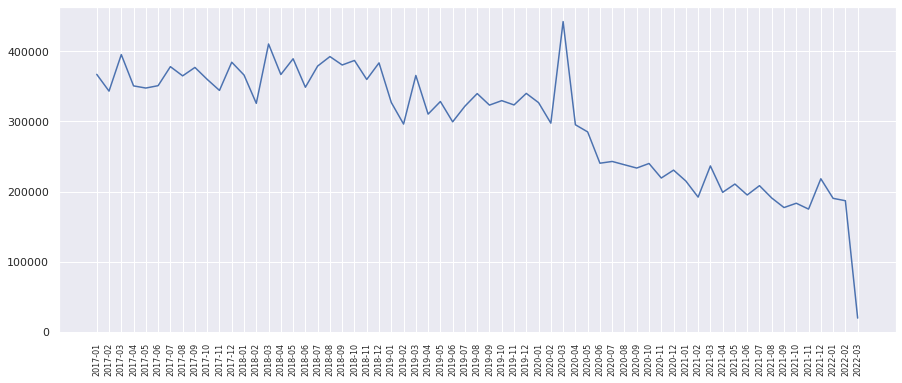

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df_trend['year_month'], df_trend['qty'])
plt.xticks(rotation='vertical', size=8)
plt.show()

In [ ]:
df.nunique()

tgl             12606365
satuan                60
qty                 3663
hargajual           5245
barcode            31397
kodejenis            582
kodekategori         116
kategori             116
year_month            63
month_yr              63
dtype: int64

In [ ]:
# top 10 most selling poducts
prod_sales = pd.DataFrame(df.groupby('barcode').sum()['qty'])

In [ ]:
prod_sales = prod_sales.sort_values('qty', ascending=False)

In [ ]:
prod_sales[:10]

,qty
barcode,
56102,380521.56
56103,273262.30
089686010947,245563.00
8998866200301,173691.00
8992696404441,104711.00
56101,103481.00
8998866200325,84903.00
13662,78165.00
8886008101336,76402.00


In [ ]:
daily_sales = df.groupby("year_month", as_index=False)['qty'].sum()
# store_daily_sales = df.groupby(['store', 'year_month'], as_index=False)['sales'].sum()
item_daily_sales = df.groupby(['barcode', 'year_month'], as_index=False)['qty'].sum()

In [ ]:
# dail sales

daily_sales_sc = go.Scatter(x=daily_sales['year_month'], y=daily_sales['qty'])
layout = go.Layout(title='Daily sales', xaxis=dict(title='year_month'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[daily_sales_sc], layout=layout)
iplot(fig)

In [ ]:
%ls

data-2015-renew.csv  data-2022-renew.csv   df_train_raw.csv
data-2016-renew.csv  df_pred.csv           df_train_raw_new.csv
data-2017-renew.csv  df_pred_feb.csv       gru_model.h5
data-2018-renew.csv  df_pred_jan.csv       gru_model.sav
data-2019-renew.csv  df_train.csv          kategori_delist.csv
data-2020-renew.csv  df_train_feb_new.csv  test_result.csv
data-2021-renew.csv  df_train_jan_new.csv


In [ ]:
from keras.models import load_model

In [ ]:
jan = pd.read_csv('df_pred_jan.csv')
feb = pd.read_csv('df_pred_feb.csv')
gru_model = load_model('gru_model.h5')

In [ ]:
display(jan)
display(feb)

,barcode,0,1,2,3,4,5,6,7,8,9,10,11
0,11747233057,2.00,5.00,11.00,2.00,6.00,4.00,1.00,6.00,1.00,0.00,3.00,4.00
1,11747234207,17.00,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00
2,55500130221,10.00,17.00,19.00,9.00,10.00,8.00,16.00,10.00,4.00,13.00,7.00,3.00


,barcode,1,2,3,4,5,6,7,8,9,10,11,12
0,11747233057,5.00,11.00,2.00,6.00,4.00,1.00,6.00,1.00,0.00,3.00,4.00,0.00
1,11747234207,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00,12.00
2,55500130221,17.00,19.00,9.00,10.00,8.00,16.00,10.00,4.00,13.00,7.00,3.00,11.00


In [ ]:
# get data selected product list from 2021 and 2022 for ploting on website

product_list = ['011747233057', '011747234207', '055500130221']

# selected_data = jan[jan['barcode'].isin(product_list)].reset_index(drop=True)
# drop_jan = jan.drop(['barcode'], axis=1, inplace=True)
# drop_feb = feb.drop(['barcode'], axis=1, inplace=True)
drop_jan = jan.iloc[:, 1:]
drop_feb = feb.iloc[:, 1:]

display(drop_jan)
display(drop_feb)

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.00,5.00,11.00,2.00,6.00,4.00,1.00,6.00,1.00,0.00,3.00,4.00
1,17.00,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00
2,10.00,17.00,19.00,9.00,10.00,8.00,16.00,10.00,4.00,13.00,7.00,3.00


,1,2,3,4,5,6,7,8,9,10,11,12
0,5.00,11.00,2.00,6.00,4.00,1.00,6.00,1.00,0.00,3.00,4.00,0.00
1,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00,12.00
2,17.00,19.00,9.00,10.00,8.00,16.00,10.00,4.00,13.00,7.00,3.00,11.00


In [ ]:
bb = feb.columns
bb

Index(['barcode', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12'],
      dtype='object')

In [ ]:
jann = jan.T

In [ ]:
print(jan.iloc[:, :1].values)
print(jan.iloc[:, 1:].values)
print(jan.columns[1:].values)

[[11747233057]
 [11747234207]
 [55500130221]]
[[ 2.  5. 11.  2.  6.  4.  1.  6.  1.  0.  3.  4.]
 [17.  9. 12. 14. 12. 19. 14. 15. 14. 16. 20. 24.]
 [10. 17. 19.  9. 10.  8. 16. 10.  4. 13.  7.  3.]]
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11']


In [ ]:
X_jan = drop_jan.values.reshape((drop_jan.shape[0], drop_jan.shape[1], 1))
X_feb = drop_feb.values.reshape((drop_feb.shape[0], drop_feb.shape[1], 1))
jan_pred = gru_model.predict(X_jan)
feb_pred = gru_model.predict(X_feb)

In [ ]:
display(jan_pred)
display(feb_pred)

array([[ 3.6488318],
       [19.308125 ],
       [ 7.7799997]], dtype=float32)

array([[ 2.238058],
       [16.649498],
       [10.354751]], dtype=float32)

In [ ]:
# pred = pd.DataFrame({'jan_pred': jan_pred.flatten(), 'feb_pred': feb_pred.flatten()}, index=[0])
# pred

In [ ]:
last = feb.iloc[:, -1:] # get last column (12)

In [ ]:
feb['13'] = feb_pred

In [ ]:
# feb.info()
feb

,barcode,1,2,3,4,5,6,7,8,9,10,11,12,13
0,11747233057,5.00,11.00,2.00,6.00,4.00,1.00,6.00,1.00,0.00,3.00,4.00,0.00,2.24
1,11747234207,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00,12.00,16.65
2,55500130221,17.00,19.00,9.00,10.00,8.00,16.00,10.00,4.00,13.00,7.00,3.00,11.00,10.35


In [ ]:
# transform data to get january and february 2022 sales product record
train_monthly = df[['tgl', 'month_yr', 'kodejenis', 'barcode', 'qty']].copy()
train_monthly = train_monthly.sort_values('tgl').groupby(['month_yr', 'kodejenis', 'barcode'], as_index=False)
train_monthly = train_monthly.agg({'qty':['sum']})
train_monthly.columns = ['month_yr', 'kodejenis', 'barcode', 'qty_cnt']
train_monthly = train_monthly.query('qty_cnt >= 0 and qty_cnt <= 50')

train_monthly['qty_cnt_month'] = train_monthly.sort_values('month_yr').groupby(['barcode', 'kodejenis'])['qty_cnt'].shift(-1)
monthly_series = train_monthly.pivot_table(index=['barcode', 'kodejenis'], columns='month_yr',values='qty_cnt', fill_value=0).reset_index()
monthly_series.head()

month_yr,barcode,kodejenis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,00100809,01011601,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.69,15.35,20.38,13.80,7.03,8.72,11.13,11.36,16.29,7.11,10.22,11.02,12.75,10.78,27.13,32.93,18.57,11.34,13.62,12.14,8.19,4.22,2.76,3.97,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59,5.67,2.89,0.30
1,00100809,20604,8.04,10.89,15.34,14.70,15.63,20.85,11.92,16.73,14.30,14.26,11.93,11.39,14.40,12.55,20.04,15.83,14.22,19.72,20.78,19.90,12.00,11.78,14.68,14.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,00113731,02020101,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.60,3.46,4.43,4.75,6.09,4.07,5.42,4.27,4.89,3.76,3.62,2.89,3.61,0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.75,0.78,0.45,1.72,0.32,0.87,0.00,0.00
3,00113731,20607,1.51,0.00,0.00,0.00,0.00,0.00,0.00,1.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,00125789,02010120,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,9.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# select product from selected barcode
monthly_series_list = ['011747233057', '011747234207', '055500130221']
monthly_series_select = monthly_series[monthly_series['barcode'].isin(product_list)].reset_index(drop=True)

In [ ]:
# pikirin lagi karena 1 barcode memiliki lebih dari 1 kodejenis, gunakan berdasarkan kodejenis atau kodekategori
monthly_series_select = monthly_series_select.drop_duplicates(subset=['barcode']) # drop duplicates barcode
# selected_product_2022 = monthly_series_select.iloc[:, 62:-1]
selected_product_2022 = monthly_series_select.iloc[:, :]
selected_product_2022.columns[61:-1].values

array([59, 60, 61], dtype=object)

In [ ]:
# daily sales by item
selected_product_2022_sc = []
for item in selected_product_2022['barcode'].unique():
    current_selected_product_2022 = selected_product_2022[(selected_product_2022['barcode'] == item)]
    selected_product_2022_sc.append(go.Scatter(x=current_selected_product_2022.columns[61:-1].values, y=current_selected_product_2022.iloc[:, 61:-1].values.flatten(), name=('Item %s' % item)))
    print(item)
print(selected_product_2022_sc)
layout = go.Layout(title='Item daily sales forecasting', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=selected_product_2022_sc, layout=layout)
iplot(fig)

011747233057
011747234207
055500130221
[Scatter({
    'name': 'Item 011747233057', 'x': array([59, 60, 61], dtype=object), 'y': array([4., 0., 3.])
}), Scatter({
    'name': 'Item 011747234207', 'x': array([59, 60, 61], dtype=object), 'y': array([24., 12.,  8.])
}), Scatter({
    'name': 'Item 055500130221', 'x': array([59, 60, 61], dtype=object), 'y': array([ 3., 11., 18.])
})]


In [ ]:
# grouping data
df_list = ['011747233057', '011747234207', '055500130221']
df_date = ['2022-01', '2022-03']

# df_select = df[df['barcode'].isin(product_list)].reset_index(drop=True)
filter1 = df['barcode'].isin(product_list)
filter2 = df['year_month'].isin(df_date)
df_select = df[filter1 & filter2]

In [ ]:
# daily_sales = df.groupby("year_month", as_index=False)['qty'].sum()
item_daily_sales_2022 = df_select.groupby(['barcode', 'year_month'], as_index=False)['qty'].sum()

In [ ]:
# dail sales

item_daily_sales_2022_sc = go.Scatter(x=item_daily_sales_2022['year_month'], y=item_daily_sales_2022['qty'])
layout = go.Layout(title='Daily sales', xaxis=dict(title='year_month'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[item_daily_sales_2022_sc], layout=layout)
iplot(fig)

In [ ]:
# for name in jan['barcode'].values:
#     print(name)
#     for item in feb.values:
#       print(item)
  # print(item.iloc[:, :1].values)
  # print(item.iloc[:, 1:].values)
  # plt.plot(feb.columns, item, label=)

selected_data_sc = []
for item in jan['barcode'].unique():
    current_selected_data = jan[(jan['barcode'] == item)]
    selected_data_sc.append(go.Scatter(x=current_selected_data.columns[1:].values, y=current_selected_data.iloc[:, 1:].values.flatten(), name=('Item %s' % item)))
    selected_data_sc.append(go.Scatter(x=current_selected_data.columns[1:].values, y=current_selected_data.iloc[:, 1:].values.flatten(), name=('Pred Item %s' % item)))
    # selected_data_sc.append(go.Scatter(x=jan.columns[1:].values, y=current_selected_data.iloc[:, 1:].values.flatten(), name=('Item %s' % item)))
    print(item)
# print(selected_data_sc)
layout = go.Layout(title='Item monthly sales', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=selected_data_sc, layout=layout)
iplot(fig)

11747233057
11747234207
55500130221
[Scatter({
    'name': 'Item 11747233057',
    'x': array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
               dtype=object),
    'y': array([ 2.,  5., 11.,  2.,  6.,  4.,  1.,  6.,  1.,  0.,  3.,  4.])
}), Scatter({
    'name': 'Pred Item 11747233057',
    'x': array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
               dtype=object),
    'y': array([ 2.,  5., 11.,  2.,  6.,  4.,  1.,  6.,  1.,  0.,  3.,  4.])
}), Scatter({
    'name': 'Item 11747234207',
    'x': array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
               dtype=object),
    'y': array([17.,  9., 12., 14., 12., 19., 14., 15., 14., 16., 20., 24.])
}), Scatter({
    'name': 'Pred Item 11747234207',
    'x': array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
               dtype=object),
    'y': array([17.,  9., 12., 14., 12., 19., 14., 15., 14., 16., 20., 24.])
}), Scatter({
    'name': 'It